In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape(((72*3+1)*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape(((72*3+1)*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(911, 100, 100)


In [17]:
print(y_test.shape)

(391, 100, 100)


In [18]:
print(x_train.shape)

(911, 15, 1)


In [19]:
print(x_test.shape)

(391, 15, 1)


In [20]:
theta_train.shape

(911,)

In [21]:
tsr_train.shape

(911,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((911, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((391, 2, 1))

In [28]:
tsr_theta_train.shape

(911, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
23/23 [==============================] - 1s 3ms/step - loss: 0.0204 - rmse: 0.1430
Epoch 2/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 3/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 4/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 5/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 6/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 7/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 8/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 9/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 10/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 11/10000
23/23 [=======

23/23 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 85/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 86/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 87/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1267
Epoch 88/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 89/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 90/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 91/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 92/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 93/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 94/10000
23/23 [=============

23/23 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1166
Epoch 168/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1173
Epoch 169/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 170/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1158
Epoch 171/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1158
Epoch 172/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1155
Epoch 173/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1150
Epoch 174/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1150
Epoch 175/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1153
Epoch 176/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1154
Epoch 177/10000
23/23 [===

23/23 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0994
Epoch 250/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0995
Epoch 251/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 252/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0991
Epoch 253/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0987
Epoch 254/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 255/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0982
Epoch 256/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0984
Epoch 257/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 258/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 259/10000
23/23 [===

23/23 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 332/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0862
Epoch 333/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 334/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0857
Epoch 335/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0863
Epoch 336/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 337/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0853
Epoch 338/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 339/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0073 - rmse: 0.0853
Epoch 340/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 341/10000
23/23 [===

23/23 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0755
Epoch 414/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 415/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 416/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0752
Epoch 417/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 418/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 419/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 420/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0745
Epoch 421/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 422/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 423/10000
23/23 [===

23/23 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 496/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 497/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 498/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0657
Epoch 499/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 500/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 501/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 502/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 503/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 504/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 505/10000
23/23 [===

23/23 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 578/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0560
Epoch 579/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 580/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 581/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 582/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 583/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 584/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 585/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 586/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 587/10000
23/23 [===

23/23 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 660/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 661/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 662/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 663/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 664/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 665/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 666/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 667/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 668/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 669/10000
23/23 [===

23/23 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0417
Epoch 742/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 743/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 744/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0418
Epoch 745/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 746/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 747/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0417
Epoch 748/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 749/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 750/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 751/10000
23/23 [===

23/23 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 824/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 825/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 826/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 827/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 828/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 829/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 830/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 831/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 832/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 833/10000
23/23 [===

23/23 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 906/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 907/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 908/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 909/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 910/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 911/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 912/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 913/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 914/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 915/10000
23/23 [===

23/23 [==============================] - 0s 4ms/step - loss: 8.8285e-04 - rmse: 0.0297
Epoch 987/10000
23/23 [==============================] - 0s 3ms/step - loss: 9.1325e-04 - rmse: 0.0302
Epoch 988/10000
23/23 [==============================] - 0s 3ms/step - loss: 8.4659e-04 - rmse: 0.0291
Epoch 989/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.6104e-04 - rmse: 0.0293
Epoch 990/10000
23/23 [==============================] - 0s 3ms/step - loss: 8.6419e-04 - rmse: 0.0294
Epoch 991/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.5097e-04 - rmse: 0.0292
Epoch 992/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.4506e-04 - rmse: 0.0291
Epoch 993/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.5957e-04 - rmse: 0.0293
Epoch 994/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.6016e-04 - rmse: 0.0293
Epoch 995/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.3779e-04 -

23/23 [==============================] - 0s 4ms/step - loss: 7.1536e-04 - rmse: 0.0267
Epoch 1066/10000
23/23 [==============================] - 0s 3ms/step - loss: 7.7569e-04 - rmse: 0.0279
Epoch 1067/10000
23/23 [==============================] - 0s 3ms/step - loss: 7.5821e-04 - rmse: 0.0275
Epoch 1068/10000
23/23 [==============================] - 0s 3ms/step - loss: 7.7466e-04 - rmse: 0.0278
Epoch 1069/10000
23/23 [==============================] - 0s 3ms/step - loss: 8.3816e-04 - rmse: 0.0290
Epoch 1070/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.2967e-04 - rmse: 0.0288
Epoch 1071/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.4375e-04 - rmse: 0.0273
Epoch 1072/10000
23/23 [==============================] - 0s 3ms/step - loss: 7.0210e-04 - rmse: 0.0265
Epoch 1073/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.2382e-04 - rmse: 0.0269
Epoch 1074/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.2

23/23 [==============================] - 0s 4ms/step - loss: 6.6015e-04 - rmse: 0.0257
Epoch 1144/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.3684e-04 - rmse: 0.0252
Epoch 1145/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0806e-04 - rmse: 0.0247
Epoch 1146/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7434e-04 - rmse: 0.0240
Epoch 1147/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.4005e-04 - rmse: 0.0253
Epoch 1148/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.2410e-04 - rmse: 0.0250
Epoch 1149/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.8909e-04 - rmse: 0.0263
Epoch 1150/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.8938e-04 - rmse: 0.0263
Epoch 1151/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.0001e-04 - rmse: 0.0245
Epoch 1152/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.0

23/23 [==============================] - 0s 3ms/step - loss: 6.1834e-04 - rmse: 0.0249
Epoch 1222/10000
23/23 [==============================] - 0s 3ms/step - loss: 5.8850e-04 - rmse: 0.0243
Epoch 1223/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.3217e-04 - rmse: 0.0231
Epoch 1224/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0076e-04 - rmse: 0.0224
Epoch 1225/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.8435e-04 - rmse: 0.0220
Epoch 1226/10000
23/23 [==============================] - 0s 3ms/step - loss: 5.1403e-04 - rmse: 0.0227
Epoch 1227/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.4387e-04 - rmse: 0.0233
Epoch 1228/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.4308e-04 - rmse: 0.0233
Epoch 1229/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.8459e-04 - rmse: 0.0242
Epoch 1230/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.8

23/23 [==============================] - 0s 4ms/step - loss: 4.1248e-04 - rmse: 0.0203
Epoch 1300/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.3564e-04 - rmse: 0.0209
Epoch 1301/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.3996e-04 - rmse: 0.0210
Epoch 1302/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.9854e-04 - rmse: 0.0223
Epoch 1303/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6747e-04 - rmse: 0.0216
Epoch 1304/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.4806e-04 - rmse: 0.0212
Epoch 1305/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6360e-04 - rmse: 0.0215
Epoch 1306/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.4180e-04 - rmse: 0.0210
Epoch 1307/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.3091e-04 - rmse: 0.0208
Epoch 1308/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1

23/23 [==============================] - 0s 4ms/step - loss: 3.5136e-04 - rmse: 0.0187
Epoch 1378/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.7727e-04 - rmse: 0.0194
Epoch 1379/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1229e-04 - rmse: 0.0203
Epoch 1380/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.5066e-04 - rmse: 0.0212
Epoch 1381/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9259e-04 - rmse: 0.0198
Epoch 1382/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4300e-04 - rmse: 0.0185
Epoch 1383/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4176e-04 - rmse: 0.0185
Epoch 1384/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5641e-04 - rmse: 0.0189
Epoch 1385/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7049e-04 - rmse: 0.0192
Epoch 1386/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 4.0148e-04 - rmse: 0.0200
Epoch 1456/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6772e-04 - rmse: 0.0192
Epoch 1457/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4912e-04 - rmse: 0.0187
Epoch 1458/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1283e-04 - rmse: 0.0177
Epoch 1459/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2933e-04 - rmse: 0.0181
Epoch 1460/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.3448e-04 - rmse: 0.0183
Epoch 1461/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0953e-04 - rmse: 0.0176
Epoch 1462/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1066e-04 - rmse: 0.0176
Epoch 1463/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0905e-04 - rmse: 0.0176
Epoch 1464/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9

23/23 [==============================] - 0s 4ms/step - loss: 2.9116e-04 - rmse: 0.0171
Epoch 1534/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1116e-04 - rmse: 0.0176
Epoch 1535/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8629e-04 - rmse: 0.0169
Epoch 1536/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.3987e-04 - rmse: 0.0184
Epoch 1537/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1652e-04 - rmse: 0.0178
Epoch 1538/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9882e-04 - rmse: 0.0173
Epoch 1539/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0906e-04 - rmse: 0.0176
Epoch 1540/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6849e-04 - rmse: 0.0216
Epoch 1541/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9303e-04 - rmse: 0.0198
Epoch 1542/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1

23/23 [==============================] - 0s 4ms/step - loss: 2.8921e-04 - rmse: 0.0170
Epoch 1612/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8869e-04 - rmse: 0.0170
Epoch 1613/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7866e-04 - rmse: 0.0167
Epoch 1614/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7050e-04 - rmse: 0.0164
Epoch 1615/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5568e-04 - rmse: 0.0160
Epoch 1616/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6850e-04 - rmse: 0.0164
Epoch 1617/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6341e-04 - rmse: 0.0162
Epoch 1618/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7188e-04 - rmse: 0.0165
Epoch 1619/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9064e-04 - rmse: 0.0170
Epoch 1620/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1

23/23 [==============================] - 0s 6ms/step - loss: 2.2138e-04 - rmse: 0.0149
Epoch 1690/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4853e-04 - rmse: 0.0158
Epoch 1691/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4869e-04 - rmse: 0.0158
Epoch 1692/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4248e-04 - rmse: 0.0156
Epoch 1693/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4706e-04 - rmse: 0.0157
Epoch 1694/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5002e-04 - rmse: 0.0158
Epoch 1695/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2044e-04 - rmse: 0.0148
Epoch 1696/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0637e-04 - rmse: 0.0144
Epoch 1697/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0556e-04 - rmse: 0.0143
Epoch 1698/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0

23/23 [==============================] - 0s 4ms/step - loss: 2.6488e-04 - rmse: 0.0163
Epoch 1768/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3711e-04 - rmse: 0.0154
Epoch 1769/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3267e-04 - rmse: 0.0153
Epoch 1770/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2017e-04 - rmse: 0.0148
Epoch 1771/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0865e-04 - rmse: 0.0144
Epoch 1772/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0273e-04 - rmse: 0.0142
Epoch 1773/10000
23/23 [==============================] - 0s 3ms/step - loss: 1.8645e-04 - rmse: 0.0137
Epoch 1774/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7483e-04 - rmse: 0.0132
Epoch 1775/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7672e-04 - rmse: 0.0133
Epoch 1776/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0

23/23 [==============================] - 0s 4ms/step - loss: 2.1844e-04 - rmse: 0.0148
Epoch 1846/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.1463e-04 - rmse: 0.0147
Epoch 1847/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3472e-04 - rmse: 0.0153
Epoch 1848/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3061e-04 - rmse: 0.0152
Epoch 1849/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0985e-04 - rmse: 0.0145
Epoch 1850/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0087e-04 - rmse: 0.0142
Epoch 1851/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0492e-04 - rmse: 0.0143
Epoch 1852/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9669e-04 - rmse: 0.0140
Epoch 1853/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0171e-04 - rmse: 0.0142
Epoch 1854/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9

23/23 [==============================] - 0s 5ms/step - loss: 2.2265e-04 - rmse: 0.0149
Epoch 1924/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7798e-04 - rmse: 0.0133
Epoch 1925/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9752e-04 - rmse: 0.0141
Epoch 1926/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7559e-04 - rmse: 0.0133
Epoch 1927/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6874e-04 - rmse: 0.0130
Epoch 1928/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8462e-04 - rmse: 0.0136
Epoch 1929/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.1206e-04 - rmse: 0.0146
Epoch 1930/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0023e-04 - rmse: 0.0142
Epoch 1931/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7220e-04 - rmse: 0.0131
Epoch 1932/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7

23/23 [==============================] - 0s 3ms/step - loss: 1.8871e-04 - rmse: 0.0137
Epoch 2002/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6803e-04 - rmse: 0.0130
Epoch 2003/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6647e-04 - rmse: 0.0129
Epoch 2004/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3803e-04 - rmse: 0.0117
Epoch 2005/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.4762e-04 - rmse: 0.0122
Epoch 2006/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6262e-04 - rmse: 0.0128
Epoch 2007/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.5693e-04 - rmse: 0.0125
Epoch 2008/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9929e-04 - rmse: 0.0141
Epoch 2009/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8536e-04 - rmse: 0.0169
Epoch 2010/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9

23/23 [==============================] - 0s 4ms/step - loss: 2.1415e-04 - rmse: 0.0146
Epoch 2080/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.1362e-04 - rmse: 0.0146
Epoch 2081/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2046e-04 - rmse: 0.0148
Epoch 2082/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4292e-04 - rmse: 0.0156
Epoch 2083/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6702e-04 - rmse: 0.0163
Epoch 2084/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6930e-04 - rmse: 0.0164
Epoch 2085/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9884e-04 - rmse: 0.0141
Epoch 2086/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9973e-04 - rmse: 0.0141
Epoch 2087/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2942e-04 - rmse: 0.0151
Epoch 2088/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8

23/23 [==============================] - 0s 4ms/step - loss: 1.6621e-04 - rmse: 0.0129
Epoch 2158/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.5821e-04 - rmse: 0.0126
Epoch 2159/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6378e-04 - rmse: 0.0128
Epoch 2160/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8651e-04 - rmse: 0.0137
Epoch 2161/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2292e-04 - rmse: 0.0149
Epoch 2162/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6139e-04 - rmse: 0.0162
Epoch 2163/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0582e-04 - rmse: 0.0143
Epoch 2164/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0997e-04 - rmse: 0.0145
Epoch 2165/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7736e-04 - rmse: 0.0133
Epoch 2166/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.5

23/23 [==============================] - 0s 4ms/step - loss: 2.0863e-04 - rmse: 0.0144
Epoch 2236/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2857e-04 - rmse: 0.0151
Epoch 2237/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0630e-04 - rmse: 0.0144
Epoch 2238/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4472e-04 - rmse: 0.0156
Epoch 2239/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9618e-04 - rmse: 0.0140
Epoch 2240/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0156e-04 - rmse: 0.0142
Epoch 2241/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9062e-04 - rmse: 0.0138
Epoch 2242/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5956e-04 - rmse: 0.0126
Epoch 2243/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3450e-04 - rmse: 0.0116
Epoch 2244/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3

23/23 [==============================] - 0s 4ms/step - loss: 1.3984e-04 - rmse: 0.0118
Epoch 2314/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2629e-04 - rmse: 0.0112
Epoch 2315/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3387e-04 - rmse: 0.0116
Epoch 2316/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3216e-04 - rmse: 0.0115
Epoch 2317/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2468e-04 - rmse: 0.0112
Epoch 2318/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3530e-04 - rmse: 0.0116
Epoch 2319/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6070e-04 - rmse: 0.0127
Epoch 2320/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6495e-04 - rmse: 0.0128
Epoch 2321/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6171e-04 - rmse: 0.0127
Epoch 2322/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6

23/23 [==============================] - 0s 4ms/step - loss: 1.1444e-04 - rmse: 0.0107
Epoch 2392/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1013e-04 - rmse: 0.0105
Epoch 2393/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.4354e-04 - rmse: 0.0120
Epoch 2394/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8768e-04 - rmse: 0.0137
Epoch 2395/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7558e-04 - rmse: 0.0133
Epoch 2396/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4641e-04 - rmse: 0.0157
Epoch 2397/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2054e-04 - rmse: 0.0149
Epoch 2398/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.1153e-04 - rmse: 0.0145
Epoch 2399/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5846e-04 - rmse: 0.0161
Epoch 2400/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4

23/23 [==============================] - 0s 4ms/step - loss: 1.4602e-04 - rmse: 0.0121
Epoch 2470/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2547e-04 - rmse: 0.0112
Epoch 2471/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1142e-04 - rmse: 0.0106
Epoch 2472/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3033e-04 - rmse: 0.0114
Epoch 2473/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3762e-04 - rmse: 0.0117
Epoch 2474/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.5367e-04 - rmse: 0.0124
Epoch 2475/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0384e-04 - rmse: 0.0143
Epoch 2476/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9034e-04 - rmse: 0.0138
Epoch 2477/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9533e-04 - rmse: 0.0140
Epoch 2478/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5

23/23 [==============================] - 0s 4ms/step - loss: 1.8805e-04 - rmse: 0.0137
Epoch 2548/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6725e-04 - rmse: 0.0129
Epoch 2549/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.5650e-04 - rmse: 0.0125
Epoch 2550/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6647e-04 - rmse: 0.0129
Epoch 2551/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7276e-04 - rmse: 0.0131
Epoch 2552/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7128e-04 - rmse: 0.0131
Epoch 2553/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6240e-04 - rmse: 0.0127
Epoch 2554/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6125e-04 - rmse: 0.0127
Epoch 2555/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.5128e-04 - rmse: 0.0123
Epoch 2556/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4

23/23 [==============================] - 0s 4ms/step - loss: 1.3375e-04 - rmse: 0.0116
Epoch 2626/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.5601e-04 - rmse: 0.0125
Epoch 2627/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0377e-04 - rmse: 0.0143
Epoch 2628/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2181e-04 - rmse: 0.0149
Epoch 2629/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8928e-04 - rmse: 0.0138
Epoch 2630/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7033e-04 - rmse: 0.0131
Epoch 2631/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1875e-04 - rmse: 0.0109
Epoch 2632/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.7885e-05 - rmse: 0.0099
Epoch 2633/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0043e-04 - rmse: 0.0100
Epoch 2634/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1

23/23 [==============================] - 0s 4ms/step - loss: 1.2624e-04 - rmse: 0.0112
Epoch 2704/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8002e-04 - rmse: 0.0134
Epoch 2705/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3873e-04 - rmse: 0.0118
Epoch 2706/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.9213e-05 - rmse: 0.0100
Epoch 2707/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.7910e-05 - rmse: 0.0099
Epoch 2708/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0346e-04 - rmse: 0.0102
Epoch 2709/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.6559e-05 - rmse: 0.0093
Epoch 2710/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.9978e-05 - rmse: 0.0089
Epoch 2711/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.6312e-05 - rmse: 0.0093
Epoch 2712/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.9

23/23 [==============================] - 0s 5ms/step - loss: 9.3009e-05 - rmse: 0.0096
Epoch 2782/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1336e-04 - rmse: 0.0106
Epoch 2783/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3655e-04 - rmse: 0.0117
Epoch 2784/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2057e-04 - rmse: 0.0110
Epoch 2785/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1768e-04 - rmse: 0.0108
Epoch 2786/10000
23/23 [==============================] - 0s 3ms/step - loss: 1.1572e-04 - rmse: 0.0108
Epoch 2787/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2113e-04 - rmse: 0.0110
Epoch 2788/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2330e-04 - rmse: 0.0111
Epoch 2789/10000
23/23 [==============================] - 0s 3ms/step - loss: 1.0053e-04 - rmse: 0.0100
Epoch 2790/10000
23/23 [==============================] - 0s 3ms/step - loss: 1.3

23/23 [==============================] - 0s 4ms/step - loss: 9.0971e-05 - rmse: 0.0095
Epoch 2860/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.8690e-05 - rmse: 0.0094
Epoch 2861/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.7188e-05 - rmse: 0.0099
Epoch 2862/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.8649e-05 - rmse: 0.0099
Epoch 2863/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1341e-04 - rmse: 0.0106
Epoch 2864/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1068e-04 - rmse: 0.0105
Epoch 2865/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1684e-04 - rmse: 0.0108
Epoch 2866/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1309e-04 - rmse: 0.0106
Epoch 2867/10000
23/23 [==============================] - 0s 3ms/step - loss: 9.7163e-05 - rmse: 0.0099
Epoch 2868/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0

23/23 [==============================] - 0s 4ms/step - loss: 1.4084e-04 - rmse: 0.0119
Epoch 2938/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.4610e-04 - rmse: 0.0121
Epoch 2939/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1799e-04 - rmse: 0.0109
Epoch 2940/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.4958e-04 - rmse: 0.0122
Epoch 2941/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1227e-04 - rmse: 0.0106
Epoch 2942/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.7501e-05 - rmse: 0.0094
Epoch 2943/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0309e-04 - rmse: 0.0102
Epoch 2944/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0265e-04 - rmse: 0.0101
Epoch 2945/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.1173e-05 - rmse: 0.0090
Epoch 2946/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.4

23/23 [==============================] - 0s 6ms/step - loss: 1.0153e-04 - rmse: 0.0101
Epoch 3016/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.5655e-05 - rmse: 0.0093
Epoch 3017/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1700e-04 - rmse: 0.0108
Epoch 3018/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1189e-04 - rmse: 0.0106
Epoch 3019/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0306e-04 - rmse: 0.0102
Epoch 3020/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1466e-04 - rmse: 0.0107
Epoch 3021/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3677e-04 - rmse: 0.0117
Epoch 3022/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3591e-04 - rmse: 0.0117
Epoch 3023/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1358e-04 - rmse: 0.0107
Epoch 3024/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1

23/23 [==============================] - 0s 4ms/step - loss: 1.6370e-04 - rmse: 0.0128
Epoch 3094/10000
23/23 [==============================] - 0s 3ms/step - loss: 1.4001e-04 - rmse: 0.0118
Epoch 3095/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0102e-04 - rmse: 0.0101
Epoch 3096/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.3145e-05 - rmse: 0.0097
Epoch 3097/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0130e-04 - rmse: 0.0101
Epoch 3098/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0492e-04 - rmse: 0.0102
Epoch 3099/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0154e-04 - rmse: 0.0101
Epoch 3100/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1231e-04 - rmse: 0.0106
Epoch 3101/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2331e-04 - rmse: 0.0111
Epoch 3102/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1

23/23 [==============================] - 0s 4ms/step - loss: 1.1301e-04 - rmse: 0.0106
Epoch 3172/10000
23/23 [==============================] - 0s 3ms/step - loss: 1.0195e-04 - rmse: 0.0101
Epoch 3173/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.5147e-05 - rmse: 0.0098
Epoch 3174/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0620e-04 - rmse: 0.0103
Epoch 3175/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2022e-04 - rmse: 0.0110
Epoch 3176/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.6921e-05 - rmse: 0.0098
Epoch 3177/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.9961e-05 - rmse: 0.0095
Epoch 3178/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1713e-04 - rmse: 0.0108
Epoch 3179/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2395e-04 - rmse: 0.0111
Epoch 3180/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.8

23/23 [==============================] - 0s 4ms/step - loss: 7.9408e-05 - rmse: 0.0089
Epoch 3250/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0512e-04 - rmse: 0.0103
Epoch 3251/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0273e-04 - rmse: 0.0101
Epoch 3252/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.8467e-05 - rmse: 0.0089
Epoch 3253/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4180e-05 - rmse: 0.0086
Epoch 3254/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.5702e-05 - rmse: 0.0098
Epoch 3255/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.9876e-05 - rmse: 0.0095
Epoch 3256/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1908e-05 - rmse: 0.0091
Epoch 3257/10000
23/23 [==============================] - 0s 3ms/step - loss: 7.6188e-05 - rmse: 0.0087
Epoch 3258/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.3

23/23 [==============================] - 0s 6ms/step - loss: 7.0384e-05 - rmse: 0.0084
Epoch 3328/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.3240e-05 - rmse: 0.0086
Epoch 3329/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.0682e-05 - rmse: 0.0095
Epoch 3330/10000
23/23 [==============================] - 0s 3ms/step - loss: 7.6262e-05 - rmse: 0.0087
Epoch 3331/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.1754e-05 - rmse: 0.0085
Epoch 3332/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.3033e-05 - rmse: 0.0085
Epoch 3333/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.5637e-05 - rmse: 0.0087
Epoch 3334/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.2239e-05 - rmse: 0.0085
Epoch 3335/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.3581e-05 - rmse: 0.0091
Epoch 3336/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.6

23/23 [==============================] - 0s 3ms/step - loss: 1.0500e-04 - rmse: 0.0102
Epoch 3406/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.8497e-05 - rmse: 0.0099
Epoch 3407/10000
23/23 [==============================] - 0s 3ms/step - loss: 9.1812e-05 - rmse: 0.0096
Epoch 3408/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.0836e-05 - rmse: 0.0090
Epoch 3409/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.5800e-05 - rmse: 0.0087
Epoch 3410/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.0939e-05 - rmse: 0.0090
Epoch 3411/10000
23/23 [==============================] - 0s 3ms/step - loss: 8.8090e-05 - rmse: 0.0094
Epoch 3412/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.7470e-05 - rmse: 0.0099
Epoch 3413/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.1585e-05 - rmse: 0.0096
Epoch 3414/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1

23/23 [==============================] - 0s 4ms/step - loss: 1.0365e-04 - rmse: 0.0102
Epoch 3484/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6716e-04 - rmse: 0.0129
Epoch 3485/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3770e-04 - rmse: 0.0117
Epoch 3486/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3306e-04 - rmse: 0.0115
Epoch 3487/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2907e-04 - rmse: 0.0114
Epoch 3488/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.4222e-04 - rmse: 0.0119
Epoch 3489/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1662e-04 - rmse: 0.0108
Epoch 3490/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.7070e-05 - rmse: 0.0088
Epoch 3491/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.0301e-05 - rmse: 0.0078
Epoch 3492/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.0

23/23 [==============================] - 0s 4ms/step - loss: 1.9695e-04 - rmse: 0.0140
Epoch 3562/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6836e-04 - rmse: 0.0130
Epoch 3563/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.5176e-04 - rmse: 0.0123
Epoch 3564/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0675e-04 - rmse: 0.0103
Epoch 3565/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.6548e-05 - rmse: 0.0082
Epoch 3566/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.9440e-05 - rmse: 0.0083
Epoch 3567/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.7129e-05 - rmse: 0.0088
Epoch 3568/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.2682e-05 - rmse: 0.0079
Epoch 3569/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.8326e-05 - rmse: 0.0076
Epoch 3570/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.4

23/23 [==============================] - 0s 4ms/step - loss: 7.9670e-05 - rmse: 0.0089
Epoch 3640/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0752e-04 - rmse: 0.0104
Epoch 3641/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.9543e-05 - rmse: 0.0100
Epoch 3642/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.7898e-05 - rmse: 0.0088
Epoch 3643/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.5958e-05 - rmse: 0.0087
Epoch 3644/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.0066e-05 - rmse: 0.0084
Epoch 3645/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4512e-05 - rmse: 0.0074
Epoch 3646/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1671e-05 - rmse: 0.0072
Epoch 3647/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.7710e-05 - rmse: 0.0088
Epoch 3648/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.2

23/23 [==============================] - 0s 5ms/step - loss: 7.7838e-05 - rmse: 0.0088
Epoch 3718/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3331e-04 - rmse: 0.0115
Epoch 3719/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1258e-04 - rmse: 0.0106
Epoch 3720/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.9056e-05 - rmse: 0.0089
Epoch 3721/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.8964e-05 - rmse: 0.0077
Epoch 3722/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.1782e-05 - rmse: 0.0079
Epoch 3723/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.8076e-05 - rmse: 0.0088
Epoch 3724/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2167e-04 - rmse: 0.0110
Epoch 3725/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4189e-04 - rmse: 0.0156
Epoch 3726/10000
23/23 [==============================] - 0s 3ms/step - loss: 2.3

23/23 [==============================] - 0s 5ms/step - loss: 9.0099e-05 - rmse: 0.0095
Epoch 3796/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3615e-04 - rmse: 0.0117
Epoch 3797/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.4408e-04 - rmse: 0.0120
Epoch 3798/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.1487e-04 - rmse: 0.0147
Epoch 3799/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3129e-04 - rmse: 0.0115
Epoch 3800/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.5845e-05 - rmse: 0.0081
Epoch 3801/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0959e-05 - rmse: 0.0071
Epoch 3802/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.8101e-05 - rmse: 0.0069
Epoch 3803/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.9202e-05 - rmse: 0.0077
Epoch 3804/10000
23/23 [==============================] - 0s 3ms/step - loss: 6.2

23/23 [==============================] - 0s 4ms/step - loss: 1.0728e-04 - rmse: 0.0104
Epoch 3874/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.9702e-05 - rmse: 0.0100
Epoch 3875/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1641e-04 - rmse: 0.0108
Epoch 3876/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5141e-04 - rmse: 0.0123
Epoch 3877/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5140e-04 - rmse: 0.0123
Epoch 3878/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3261e-04 - rmse: 0.0115
Epoch 3879/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3020e-04 - rmse: 0.0114
Epoch 3880/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.9711e-05 - rmse: 0.0089
Epoch 3881/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.1751e-05 - rmse: 0.0079
Epoch 3882/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.1

23/23 [==============================] - 0s 4ms/step - loss: 1.0324e-04 - rmse: 0.0102
Epoch 3952/10000
23/23 [==============================] - 0s 3ms/step - loss: 8.2892e-05 - rmse: 0.0091
Epoch 3953/10000
23/23 [==============================] - 0s 3ms/step - loss: 9.1011e-05 - rmse: 0.0095
Epoch 3954/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.1751e-05 - rmse: 0.0090
Epoch 3955/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.2716e-05 - rmse: 0.0085
Epoch 3956/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.6003e-05 - rmse: 0.0081
Epoch 3957/10000
23/23 [==============================] - 0s 3ms/step - loss: 5.0473e-05 - rmse: 0.0071
Epoch 3958/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1271e-05 - rmse: 0.0072
Epoch 3959/10000
23/23 [==============================] - 0s 3ms/step - loss: 4.4135e-05 - rmse: 0.0066
Epoch 3960/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.0

23/23 [==============================] - 0s 3ms/step - loss: 5.7214e-05 - rmse: 0.0076
Epoch 4030/10000
23/23 [==============================] - 0s 3ms/step - loss: 5.3611e-05 - rmse: 0.0073
Epoch 4031/10000
23/23 [==============================] - 0s 3ms/step - loss: 5.3711e-05 - rmse: 0.0073
Epoch 4032/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.6038e-05 - rmse: 0.0075
Epoch 4033/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.9021e-05 - rmse: 0.0083
Epoch 4034/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.4404e-05 - rmse: 0.0080
Epoch 4035/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.2043e-05 - rmse: 0.0072
Epoch 4036/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.2502e-05 - rmse: 0.0072
Epoch 4037/10000
23/23 [==============================] - 0s 3ms/step - loss: 5.0145e-05 - rmse: 0.0071
Epoch 4038/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.1

23/23 [==============================] - 0s 4ms/step - loss: 9.4511e-05 - rmse: 0.0097
Epoch 4108/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.8492e-05 - rmse: 0.0099
Epoch 4109/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0058e-04 - rmse: 0.0100
Epoch 4110/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2449e-04 - rmse: 0.0112
Epoch 4111/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3004e-04 - rmse: 0.0114
Epoch 4112/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.6759e-05 - rmse: 0.0098
Epoch 4113/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.5292e-05 - rmse: 0.0098
Epoch 4114/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.1774e-05 - rmse: 0.0085
Epoch 4115/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0099e-05 - rmse: 0.0071
Epoch 4116/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.2

23/23 [==============================] - 0s 4ms/step - loss: 5.2475e-05 - rmse: 0.0072
Epoch 4186/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.2167e-05 - rmse: 0.0072
Epoch 4187/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.1656e-05 - rmse: 0.0079
Epoch 4188/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.3156e-05 - rmse: 0.0079
Epoch 4189/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1922e-05 - rmse: 0.0072
Epoch 4190/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.4789e-05 - rmse: 0.0074
Epoch 4191/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.4534e-05 - rmse: 0.0086
Epoch 4192/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.2508e-05 - rmse: 0.0079
Epoch 4193/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.7124e-05 - rmse: 0.0082
Epoch 4194/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.7

23/23 [==============================] - 0s 4ms/step - loss: 3.8725e-05 - rmse: 0.0062
Epoch 4264/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.2198e-05 - rmse: 0.0065
Epoch 4265/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.5104e-05 - rmse: 0.0067
Epoch 4266/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1362e-05 - rmse: 0.0072
Epoch 4267/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.5992e-05 - rmse: 0.0075
Epoch 4268/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.7132e-05 - rmse: 0.0076
Epoch 4269/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.5522e-05 - rmse: 0.0081
Epoch 4270/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.9693e-05 - rmse: 0.0083
Epoch 4271/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.4366e-05 - rmse: 0.0097
Epoch 4272/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.6

23/23 [==============================] - 0s 4ms/step - loss: 6.8019e-05 - rmse: 0.0082
Epoch 4342/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.9127e-05 - rmse: 0.0083
Epoch 4343/10000
23/23 [==============================] - 0s 3ms/step - loss: 8.5771e-05 - rmse: 0.0093
Epoch 4344/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2100e-04 - rmse: 0.0110
Epoch 4345/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1161e-04 - rmse: 0.0106
Epoch 4346/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0922e-04 - rmse: 0.0105
Epoch 4347/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1644e-04 - rmse: 0.0108
Epoch 4348/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2192e-04 - rmse: 0.0110
Epoch 4349/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9377e-04 - rmse: 0.0139
Epoch 4350/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6

23/23 [==============================] - 0s 3ms/step - loss: 3.8482e-05 - rmse: 0.0062
Epoch 4420/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9197e-05 - rmse: 0.0063
Epoch 4421/10000
23/23 [==============================] - 0s 3ms/step - loss: 4.4090e-05 - rmse: 0.0066
Epoch 4422/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.7965e-05 - rmse: 0.0076
Epoch 4423/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.0728e-05 - rmse: 0.0090
Epoch 4424/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0210e-04 - rmse: 0.0101
Epoch 4425/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.7597e-05 - rmse: 0.0094
Epoch 4426/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.3511e-05 - rmse: 0.0091
Epoch 4427/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0132e-04 - rmse: 0.0101
Epoch 4428/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.5

23/23 [==============================] - 0s 4ms/step - loss: 7.8001e-05 - rmse: 0.0088
Epoch 4498/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0406e-04 - rmse: 0.0102
Epoch 4499/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0306e-04 - rmse: 0.0102
Epoch 4500/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.9984e-05 - rmse: 0.0095
Epoch 4501/10000
23/23 [==============================] - 0s 3ms/step - loss: 6.4682e-05 - rmse: 0.0080
Epoch 4502/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.2587e-05 - rmse: 0.0085
Epoch 4503/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.4911e-05 - rmse: 0.0074
Epoch 4504/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.0978e-05 - rmse: 0.0064
Epoch 4505/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.8946e-05 - rmse: 0.0070
Epoch 4506/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.3

23/23 [==============================] - 0s 4ms/step - loss: 6.3634e-05 - rmse: 0.0080
Epoch 4576/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.1792e-05 - rmse: 0.0085
Epoch 4577/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.3391e-05 - rmse: 0.0080
Epoch 4578/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0902e-05 - rmse: 0.0071
Epoch 4579/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1669e-05 - rmse: 0.0065
Epoch 4580/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4072e-05 - rmse: 0.0066
Epoch 4581/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6388e-05 - rmse: 0.0068
Epoch 4582/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.0877e-05 - rmse: 0.0078
Epoch 4583/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.9563e-05 - rmse: 0.0083
Epoch 4584/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6

23/23 [==============================] - 0s 4ms/step - loss: 7.9906e-05 - rmse: 0.0089
Epoch 4654/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.4561e-05 - rmse: 0.0097
Epoch 4655/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.7643e-05 - rmse: 0.0088
Epoch 4656/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.2024e-05 - rmse: 0.0079
Epoch 4657/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9687e-05 - rmse: 0.0083
Epoch 4658/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1894e-05 - rmse: 0.0072
Epoch 4659/10000
23/23 [==============================] - 0s 3ms/step - loss: 5.3226e-05 - rmse: 0.0073
Epoch 4660/10000
23/23 [==============================] - 0s 3ms/step - loss: 4.8685e-05 - rmse: 0.0070
Epoch 4661/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.4827e-05 - rmse: 0.0074
Epoch 4662/10000
23/23 [==============================] - 0s 3ms/step - loss: 5.5

23/23 [==============================] - 0s 4ms/step - loss: 6.4541e-05 - rmse: 0.0080
Epoch 4732/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.9081e-05 - rmse: 0.0094
Epoch 4733/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2630e-04 - rmse: 0.0112
Epoch 4734/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8457e-04 - rmse: 0.0136
Epoch 4735/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3783e-04 - rmse: 0.0154
Epoch 4736/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.5405e-04 - rmse: 0.0159
Epoch 4737/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9178e-04 - rmse: 0.0138
Epoch 4738/10000
23/23 [==============================] - 0s 3ms/step - loss: 1.7936e-04 - rmse: 0.0134
Epoch 4739/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2075e-04 - rmse: 0.0179
Epoch 4740/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4

23/23 [==============================] - 0s 4ms/step - loss: 7.5110e-05 - rmse: 0.0087
Epoch 4810/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.0329e-05 - rmse: 0.0078
Epoch 4811/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1977e-05 - rmse: 0.0072
Epoch 4812/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.4887e-05 - rmse: 0.0067
Epoch 4813/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1230e-05 - rmse: 0.0072
Epoch 4814/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.2704e-05 - rmse: 0.0073
Epoch 4815/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.2893e-05 - rmse: 0.0065
Epoch 4816/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6901e-05 - rmse: 0.0068
Epoch 4817/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.2410e-05 - rmse: 0.0072
Epoch 4818/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.7

23/23 [==============================] - 0s 4ms/step - loss: 4.4815e-05 - rmse: 0.0067
Epoch 4888/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9730e-05 - rmse: 0.0063
Epoch 4889/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4358e-05 - rmse: 0.0059
Epoch 4890/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2300e-05 - rmse: 0.0057
Epoch 4891/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4398e-05 - rmse: 0.0059
Epoch 4892/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.9340e-05 - rmse: 0.0070
Epoch 4893/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0720e-05 - rmse: 0.0071
Epoch 4894/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.4314e-05 - rmse: 0.0074
Epoch 4895/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6055e-05 - rmse: 0.0068
Epoch 4896/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1

23/23 [==============================] - 0s 4ms/step - loss: 5.7731e-05 - rmse: 0.0076
Epoch 4966/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.7282e-05 - rmse: 0.0069
Epoch 4967/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.7350e-05 - rmse: 0.0061
Epoch 4968/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.6024e-05 - rmse: 0.0060
Epoch 4969/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.5298e-05 - rmse: 0.0059
Epoch 4970/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.6188e-05 - rmse: 0.0060
Epoch 4971/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.2376e-05 - rmse: 0.0065
Epoch 4972/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1096e-05 - rmse: 0.0064
Epoch 4973/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1110e-05 - rmse: 0.0064
Epoch 4974/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0

23/23 [==============================] - 0s 4ms/step - loss: 5.3759e-05 - rmse: 0.0073
Epoch 5044/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.7411e-05 - rmse: 0.0069
Epoch 5045/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.8833e-05 - rmse: 0.0062
Epoch 5046/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1763e-05 - rmse: 0.0072
Epoch 5047/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.5150e-05 - rmse: 0.0087
Epoch 5048/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0920e-04 - rmse: 0.0104
Epoch 5049/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.3436e-05 - rmse: 0.0097
Epoch 5050/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2861e-04 - rmse: 0.0113
Epoch 5051/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2279e-04 - rmse: 0.0111
Epoch 5052/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6

23/23 [==============================] - 0s 4ms/step - loss: 3.4652e-05 - rmse: 0.0059
Epoch 5122/10000
23/23 [==============================] - 0s 3ms/step - loss: 4.2465e-05 - rmse: 0.0065
Epoch 5123/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6231e-05 - rmse: 0.0068
Epoch 5124/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.4114e-05 - rmse: 0.0080
Epoch 5125/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.7871e-05 - rmse: 0.0076
Epoch 5126/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.8735e-05 - rmse: 0.0070
Epoch 5127/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5922e-05 - rmse: 0.0068
Epoch 5128/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8555e-05 - rmse: 0.0070
Epoch 5129/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2097e-05 - rmse: 0.0065
Epoch 5130/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5

23/23 [==============================] - 0s 4ms/step - loss: 2.9205e-05 - rmse: 0.0054
Epoch 5200/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.6658e-05 - rmse: 0.0061
Epoch 5201/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.5671e-05 - rmse: 0.0075
Epoch 5202/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0630e-05 - rmse: 0.0071
Epoch 5203/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4359e-05 - rmse: 0.0067
Epoch 5204/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0439e-05 - rmse: 0.0064
Epoch 5205/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6073e-05 - rmse: 0.0075
Epoch 5206/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.8950e-05 - rmse: 0.0077
Epoch 5207/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.5530e-05 - rmse: 0.0075
Epoch 5208/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.7

23/23 [==============================] - 0s 4ms/step - loss: 5.0025e-05 - rmse: 0.0071
Epoch 5278/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9503e-05 - rmse: 0.0063
Epoch 5279/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4529e-05 - rmse: 0.0059
Epoch 5280/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1994e-05 - rmse: 0.0065
Epoch 5281/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.5862e-05 - rmse: 0.0068
Epoch 5282/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.2204e-05 - rmse: 0.0065
Epoch 5283/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9753e-05 - rmse: 0.0063
Epoch 5284/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.9807e-05 - rmse: 0.0071
Epoch 5285/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.6304e-05 - rmse: 0.0081
Epoch 5286/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.3

23/23 [==============================] - 0s 4ms/step - loss: 6.1202e-05 - rmse: 0.0078
Epoch 5356/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.7836e-05 - rmse: 0.0062
Epoch 5357/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1245e-05 - rmse: 0.0056
Epoch 5358/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2817e-05 - rmse: 0.0057
Epoch 5359/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.2394e-05 - rmse: 0.0065
Epoch 5360/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.6387e-05 - rmse: 0.0060
Epoch 5361/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2045e-05 - rmse: 0.0057
Epoch 5362/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8533e-05 - rmse: 0.0053
Epoch 5363/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7572e-05 - rmse: 0.0053
Epoch 5364/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6

23/23 [==============================] - 0s 4ms/step - loss: 4.0568e-05 - rmse: 0.0064
Epoch 5434/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1779e-05 - rmse: 0.0072
Epoch 5435/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.7097e-05 - rmse: 0.0069
Epoch 5436/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.5211e-05 - rmse: 0.0081
Epoch 5437/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0429e-04 - rmse: 0.0102
Epoch 5438/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.9456e-05 - rmse: 0.0095
Epoch 5439/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.2803e-05 - rmse: 0.0073
Epoch 5440/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.5903e-05 - rmse: 0.0060
Epoch 5441/10000
23/23 [==============================] - 0s 3ms/step - loss: 3.5346e-05 - rmse: 0.0059
Epoch 5442/10000
23/23 [==============================] - 0s 3ms/step - loss: 3.4

23/23 [==============================] - 0s 4ms/step - loss: 6.3937e-05 - rmse: 0.0080
Epoch 5512/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0332e-05 - rmse: 0.0071
Epoch 5513/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1219e-05 - rmse: 0.0064
Epoch 5514/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.2010e-05 - rmse: 0.0065
Epoch 5515/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.8482e-05 - rmse: 0.0062
Epoch 5516/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2705e-05 - rmse: 0.0057
Epoch 5517/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9465e-05 - rmse: 0.0063
Epoch 5518/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2700e-05 - rmse: 0.0065
Epoch 5519/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8278e-05 - rmse: 0.0069
Epoch 5520/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0

23/23 [==============================] - 0s 4ms/step - loss: 2.3588e-05 - rmse: 0.0049
Epoch 5590/10000
23/23 [==============================] - 0s 3ms/step - loss: 2.2793e-05 - rmse: 0.0048
Epoch 5591/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5839e-05 - rmse: 0.0051
Epoch 5592/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6916e-05 - rmse: 0.0052
Epoch 5593/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.7347e-05 - rmse: 0.0052
Epoch 5594/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.6436e-05 - rmse: 0.0051
Epoch 5595/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.7730e-05 - rmse: 0.0053
Epoch 5596/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7487e-05 - rmse: 0.0052
Epoch 5597/10000
23/23 [==============================] - 0s 3ms/step - loss: 2.7260e-05 - rmse: 0.0052
Epoch 5598/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3

23/23 [==============================] - 0s 4ms/step - loss: 8.0521e-05 - rmse: 0.0090
Epoch 5668/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.6827e-05 - rmse: 0.0075
Epoch 5669/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0676e-05 - rmse: 0.0071
Epoch 5670/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.8394e-05 - rmse: 0.0062
Epoch 5671/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.8189e-05 - rmse: 0.0069
Epoch 5672/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6897e-05 - rmse: 0.0068
Epoch 5673/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1597e-05 - rmse: 0.0064
Epoch 5674/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.4311e-05 - rmse: 0.0080
Epoch 5675/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.2078e-05 - rmse: 0.0091
Epoch 5676/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.1

23/23 [==============================] - 0s 4ms/step - loss: 9.8019e-05 - rmse: 0.0099
Epoch 5746/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.1744e-05 - rmse: 0.0096
Epoch 5747/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.7448e-05 - rmse: 0.0099
Epoch 5748/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.1572e-05 - rmse: 0.0085
Epoch 5749/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0857e-05 - rmse: 0.0071
Epoch 5750/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1845e-05 - rmse: 0.0065
Epoch 5751/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.8934e-05 - rmse: 0.0062
Epoch 5752/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9341e-05 - rmse: 0.0063
Epoch 5753/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2969e-05 - rmse: 0.0057
Epoch 5754/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.2

23/23 [==============================] - 0s 4ms/step - loss: 4.0187e-05 - rmse: 0.0063
Epoch 5824/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0928e-05 - rmse: 0.0056
Epoch 5825/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1371e-05 - rmse: 0.0056
Epoch 5826/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.7224e-05 - rmse: 0.0061
Epoch 5827/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.0797e-05 - rmse: 0.0064
Epoch 5828/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.3129e-05 - rmse: 0.0066
Epoch 5829/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.3619e-05 - rmse: 0.0073
Epoch 5830/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.7289e-05 - rmse: 0.0069
Epoch 5831/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.0385e-05 - rmse: 0.0064
Epoch 5832/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.7

23/23 [==============================] - 0s 4ms/step - loss: 7.9321e-05 - rmse: 0.0089
Epoch 5902/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.5026e-05 - rmse: 0.0092
Epoch 5903/10000
23/23 [==============================] - 0s 3ms/step - loss: 5.4354e-05 - rmse: 0.0074
Epoch 5904/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1202e-05 - rmse: 0.0064
Epoch 5905/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.3873e-05 - rmse: 0.0058
Epoch 5906/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6978e-05 - rmse: 0.0069
Epoch 5907/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.1767e-05 - rmse: 0.0079
Epoch 5908/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.2669e-05 - rmse: 0.0096
Epoch 5909/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.9206e-05 - rmse: 0.0089
Epoch 5910/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.0

23/23 [==============================] - 0s 5ms/step - loss: 4.7893e-05 - rmse: 0.0069
Epoch 5980/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5554e-05 - rmse: 0.0060
Epoch 5981/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.5570e-05 - rmse: 0.0060
Epoch 5982/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.8850e-05 - rmse: 0.0062
Epoch 5983/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.8267e-05 - rmse: 0.0062
Epoch 5984/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9494e-05 - rmse: 0.0054
Epoch 5985/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4710e-05 - rmse: 0.0050
Epoch 5986/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4159e-05 - rmse: 0.0049
Epoch 5987/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5422e-05 - rmse: 0.0050
Epoch 5988/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3

23/23 [==============================] - 0s 4ms/step - loss: 2.4840e-05 - rmse: 0.0050
Epoch 6058/10000
23/23 [==============================] - 0s 3ms/step - loss: 2.8149e-05 - rmse: 0.0053
Epoch 6059/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4969e-05 - rmse: 0.0050
Epoch 6060/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7591e-05 - rmse: 0.0053
Epoch 6061/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4771e-05 - rmse: 0.0059
Epoch 6062/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.1869e-05 - rmse: 0.0085
Epoch 6063/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.7471e-05 - rmse: 0.0094
Epoch 6064/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.0868e-05 - rmse: 0.0090
Epoch 6065/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.2354e-05 - rmse: 0.0079
Epoch 6066/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.8

23/23 [==============================] - 0s 4ms/step - loss: 5.3047e-05 - rmse: 0.0073
Epoch 6136/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.3550e-05 - rmse: 0.0066
Epoch 6137/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.4462e-05 - rmse: 0.0067
Epoch 6138/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.1384e-05 - rmse: 0.0090
Epoch 6139/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1448e-04 - rmse: 0.0107
Epoch 6140/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.8339e-05 - rmse: 0.0094
Epoch 6141/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.7415e-05 - rmse: 0.0099
Epoch 6142/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.8686e-05 - rmse: 0.0094
Epoch 6143/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.5665e-05 - rmse: 0.0093
Epoch 6144/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.4

23/23 [==============================] - 0s 4ms/step - loss: 9.4697e-05 - rmse: 0.0097
Epoch 6214/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.2235e-05 - rmse: 0.0072
Epoch 6215/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.4758e-05 - rmse: 0.0067
Epoch 6216/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.4964e-05 - rmse: 0.0067
Epoch 6217/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.5987e-05 - rmse: 0.0075
Epoch 6218/10000
23/23 [==============================] - 0s 3ms/step - loss: 4.1380e-05 - rmse: 0.0064
Epoch 6219/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1981e-05 - rmse: 0.0057
Epoch 6220/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3349e-05 - rmse: 0.0048
Epoch 6221/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7557e-05 - rmse: 0.0052
Epoch 6222/10000
23/23 [==============================] - 0s 3ms/step - loss: 4.9

23/23 [==============================] - 0s 4ms/step - loss: 3.6484e-05 - rmse: 0.0060
Epoch 6292/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4641e-05 - rmse: 0.0059
Epoch 6293/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.5882e-05 - rmse: 0.0068
Epoch 6294/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.2864e-05 - rmse: 0.0073
Epoch 6295/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.1669e-05 - rmse: 0.0079
Epoch 6296/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.2094e-05 - rmse: 0.0085
Epoch 6297/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.3411e-05 - rmse: 0.0080
Epoch 6298/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.5681e-05 - rmse: 0.0068
Epoch 6299/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.4300e-05 - rmse: 0.0067
Epoch 6300/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.3

23/23 [==============================] - 0s 4ms/step - loss: 5.1990e-05 - rmse: 0.0072
Epoch 6370/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.7757e-05 - rmse: 0.0061
Epoch 6371/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9492e-05 - rmse: 0.0063
Epoch 6372/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.8348e-05 - rmse: 0.0062
Epoch 6373/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1850e-05 - rmse: 0.0056
Epoch 6374/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.5141e-05 - rmse: 0.0067
Epoch 6375/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1116e-05 - rmse: 0.0071
Epoch 6376/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0320e-05 - rmse: 0.0071
Epoch 6377/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1824e-05 - rmse: 0.0065
Epoch 6378/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.4

23/23 [==============================] - 0s 4ms/step - loss: 2.6163e-05 - rmse: 0.0051
Epoch 6448/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6927e-05 - rmse: 0.0052
Epoch 6449/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1207e-05 - rmse: 0.0056
Epoch 6450/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7562e-05 - rmse: 0.0052
Epoch 6451/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2494e-05 - rmse: 0.0047
Epoch 6452/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2483e-05 - rmse: 0.0047
Epoch 6453/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0168e-05 - rmse: 0.0055
Epoch 6454/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4459e-05 - rmse: 0.0049
Epoch 6455/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6213e-05 - rmse: 0.0051
Epoch 6456/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6

23/23 [==============================] - 0s 5ms/step - loss: 7.4191e-05 - rmse: 0.0086
Epoch 6526/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8324e-05 - rmse: 0.0076
Epoch 6527/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6386e-05 - rmse: 0.0068
Epoch 6528/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.5048e-05 - rmse: 0.0067
Epoch 6529/10000
23/23 [==============================] - 0s 3ms/step - loss: 6.0406e-05 - rmse: 0.0078
Epoch 6530/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.1271e-05 - rmse: 0.0078
Epoch 6531/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.0406e-05 - rmse: 0.0078
Epoch 6532/10000
23/23 [==============================] - 0s 3ms/step - loss: 4.8914e-05 - rmse: 0.0070
Epoch 6533/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.8597e-05 - rmse: 0.0070
Epoch 6534/10000
23/23 [==============================] - 0s 3ms/step - loss: 3.8

23/23 [==============================] - 0s 4ms/step - loss: 3.1694e-05 - rmse: 0.0056
Epoch 6604/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.0507e-05 - rmse: 0.0064
Epoch 6605/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.0573e-05 - rmse: 0.0064
Epoch 6606/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.9003e-05 - rmse: 0.0070
Epoch 6607/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.2944e-05 - rmse: 0.0085
Epoch 6608/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.9038e-05 - rmse: 0.0089
Epoch 6609/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.9992e-05 - rmse: 0.0089
Epoch 6610/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0093e-04 - rmse: 0.0100
Epoch 6611/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.9019e-05 - rmse: 0.0094
Epoch 6612/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.6

23/23 [==============================] - 0s 4ms/step - loss: 2.9456e-05 - rmse: 0.0054
Epoch 6682/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2359e-05 - rmse: 0.0057
Epoch 6683/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9752e-05 - rmse: 0.0063
Epoch 6684/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.3298e-05 - rmse: 0.0058
Epoch 6685/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2726e-05 - rmse: 0.0057
Epoch 6686/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.3276e-05 - rmse: 0.0058
Epoch 6687/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2482e-05 - rmse: 0.0057
Epoch 6688/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9425e-05 - rmse: 0.0054
Epoch 6689/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2033e-05 - rmse: 0.0057
Epoch 6690/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 7.6037e-05 - rmse: 0.0087
Epoch 6760/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0989e-05 - rmse: 0.0078
Epoch 6761/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4612e-05 - rmse: 0.0059
Epoch 6762/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.6058e-05 - rmse: 0.0060
Epoch 6763/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5380e-05 - rmse: 0.0050
Epoch 6764/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2964e-05 - rmse: 0.0048
Epoch 6765/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2441e-05 - rmse: 0.0047
Epoch 6766/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.1025e-05 - rmse: 0.0046
Epoch 6767/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4984e-05 - rmse: 0.0050
Epoch 6768/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4

23/23 [==============================] - 0s 3ms/step - loss: 2.2647e-05 - rmse: 0.0048
Epoch 6838/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2585e-05 - rmse: 0.0048
Epoch 6839/10000
23/23 [==============================] - 0s 3ms/step - loss: 2.8153e-05 - rmse: 0.0053
Epoch 6840/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1762e-05 - rmse: 0.0056
Epoch 6841/10000
23/23 [==============================] - 0s 3ms/step - loss: 2.2895e-05 - rmse: 0.0048
Epoch 6842/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.4798e-05 - rmse: 0.0050
Epoch 6843/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0422e-05 - rmse: 0.0045
Epoch 6844/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0073e-05 - rmse: 0.0045
Epoch 6845/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.4621e-05 - rmse: 0.0050
Epoch 6846/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8

23/23 [==============================] - 0s 4ms/step - loss: 1.0136e-04 - rmse: 0.0101
Epoch 6916/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.4093e-04 - rmse: 0.0119
Epoch 6917/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2598e-04 - rmse: 0.0112
Epoch 6918/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0778e-04 - rmse: 0.0104
Epoch 6919/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.6176e-05 - rmse: 0.0098
Epoch 6920/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1065e-04 - rmse: 0.0105
Epoch 6921/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1693e-04 - rmse: 0.0108
Epoch 6922/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.2888e-05 - rmse: 0.0079
Epoch 6923/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.8844e-05 - rmse: 0.0062
Epoch 6924/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6

23/23 [==============================] - 0s 4ms/step - loss: 2.3332e-05 - rmse: 0.0048
Epoch 6994/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0191e-05 - rmse: 0.0055
Epoch 6995/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4023e-05 - rmse: 0.0058
Epoch 6996/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.7994e-05 - rmse: 0.0099
Epoch 6997/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.5428e-04 - rmse: 0.0124
Epoch 6998/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0289e-04 - rmse: 0.0142
Epoch 6999/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2636e-04 - rmse: 0.0181
Epoch 7000/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7588e-04 - rmse: 0.0166
Epoch 7001/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6648e-04 - rmse: 0.0129
Epoch 7002/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.6

23/23 [==============================] - 0s 4ms/step - loss: 3.2441e-05 - rmse: 0.0057
Epoch 7072/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9016e-05 - rmse: 0.0054
Epoch 7073/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8540e-05 - rmse: 0.0053
Epoch 7074/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4714e-05 - rmse: 0.0050
Epoch 7075/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3374e-05 - rmse: 0.0048
Epoch 7076/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0381e-05 - rmse: 0.0045
Epoch 7077/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0868e-05 - rmse: 0.0046
Epoch 7078/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.5624e-05 - rmse: 0.0051
Epoch 7079/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9524e-05 - rmse: 0.0054
Epoch 7080/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1

23/23 [==============================] - 0s 4ms/step - loss: 5.2319e-05 - rmse: 0.0072
Epoch 7150/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.3263e-05 - rmse: 0.0080
Epoch 7151/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4093e-05 - rmse: 0.0086
Epoch 7152/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.5932e-05 - rmse: 0.0093
Epoch 7153/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.0505e-05 - rmse: 0.0095
Epoch 7154/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.7033e-05 - rmse: 0.0076
Epoch 7155/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1725e-05 - rmse: 0.0072
Epoch 7156/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.4116e-05 - rmse: 0.0074
Epoch 7157/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.3024e-05 - rmse: 0.0073
Epoch 7158/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.2

23/23 [==============================] - 0s 5ms/step - loss: 3.2288e-05 - rmse: 0.0057
Epoch 7228/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1073e-05 - rmse: 0.0056
Epoch 7229/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.6064e-05 - rmse: 0.0060
Epoch 7230/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.7930e-05 - rmse: 0.0076
Epoch 7231/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6633e-05 - rmse: 0.0068
Epoch 7232/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.5204e-05 - rmse: 0.0074
Epoch 7233/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.0967e-05 - rmse: 0.0078
Epoch 7234/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1094e-05 - rmse: 0.0071
Epoch 7235/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.4121e-05 - rmse: 0.0080
Epoch 7236/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.3

23/23 [==============================] - 0s 4ms/step - loss: 4.2615e-05 - rmse: 0.0065
Epoch 7306/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0061e-05 - rmse: 0.0055
Epoch 7307/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4149e-05 - rmse: 0.0058
Epoch 7308/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0021e-05 - rmse: 0.0055
Epoch 7309/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4492e-05 - rmse: 0.0049
Epoch 7310/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1381e-05 - rmse: 0.0056
Epoch 7311/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8687e-05 - rmse: 0.0054
Epoch 7312/10000
23/23 [==============================] - 0s 3ms/step - loss: 2.4612e-05 - rmse: 0.0050
Epoch 7313/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3200e-05 - rmse: 0.0048
Epoch 7314/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5

23/23 [==============================] - 0s 4ms/step - loss: 1.6454e-05 - rmse: 0.0041
Epoch 7384/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6643e-05 - rmse: 0.0041
Epoch 7385/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7825e-05 - rmse: 0.0042
Epoch 7386/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.1806e-05 - rmse: 0.0047
Epoch 7387/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9715e-05 - rmse: 0.0044
Epoch 7388/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9215e-05 - rmse: 0.0044
Epoch 7389/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.1370e-05 - rmse: 0.0046
Epoch 7390/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.1656e-05 - rmse: 0.0047
Epoch 7391/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0695e-05 - rmse: 0.0045
Epoch 7392/10000
23/23 [==============================] - 0s 3ms/step - loss: 1.8

23/23 [==============================] - 0s 4ms/step - loss: 8.9674e-05 - rmse: 0.0095
Epoch 7462/10000
23/23 [==============================] - 0s 3ms/step - loss: 8.1530e-05 - rmse: 0.0090
Epoch 7463/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.2023e-05 - rmse: 0.0091
Epoch 7464/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.8325e-05 - rmse: 0.0070
Epoch 7465/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.5557e-05 - rmse: 0.0060
Epoch 7466/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0947e-05 - rmse: 0.0056
Epoch 7467/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.3788e-05 - rmse: 0.0058
Epoch 7468/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.2042e-05 - rmse: 0.0072
Epoch 7469/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.8778e-05 - rmse: 0.0070
Epoch 7470/10000
23/23 [==============================] - 0s 3ms/step - loss: 7.2

23/23 [==============================] - 0s 4ms/step - loss: 6.6159e-05 - rmse: 0.0081
Epoch 7540/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.5871e-05 - rmse: 0.0081
Epoch 7541/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.6182e-05 - rmse: 0.0081
Epoch 7542/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0854e-04 - rmse: 0.0104
Epoch 7543/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.5684e-05 - rmse: 0.0093
Epoch 7544/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.7752e-05 - rmse: 0.0076
Epoch 7545/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9482e-05 - rmse: 0.0063
Epoch 7546/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2559e-05 - rmse: 0.0057
Epoch 7547/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0726e-05 - rmse: 0.0055
Epoch 7548/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1

23/23 [==============================] - 0s 4ms/step - loss: 5.5098e-05 - rmse: 0.0074
Epoch 7618/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.4562e-05 - rmse: 0.0067
Epoch 7619/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.5359e-05 - rmse: 0.0074
Epoch 7620/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.7955e-05 - rmse: 0.0088
Epoch 7621/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.5943e-05 - rmse: 0.0093
Epoch 7622/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.0081e-05 - rmse: 0.0078
Epoch 7623/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1334e-05 - rmse: 0.0064
Epoch 7624/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1368e-05 - rmse: 0.0056
Epoch 7625/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1884e-05 - rmse: 0.0056
Epoch 7626/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9

23/23 [==============================] - 0s 4ms/step - loss: 4.4058e-05 - rmse: 0.0066
Epoch 7696/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.3504e-05 - rmse: 0.0080
Epoch 7697/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.2733e-05 - rmse: 0.0073
Epoch 7698/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.9335e-05 - rmse: 0.0077
Epoch 7699/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.2687e-05 - rmse: 0.0079
Epoch 7700/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.4239e-05 - rmse: 0.0086
Epoch 7701/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.6915e-05 - rmse: 0.0075
Epoch 7702/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6505e-05 - rmse: 0.0068
Epoch 7703/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.0127e-05 - rmse: 0.0063
Epoch 7704/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0

23/23 [==============================] - 0s 4ms/step - loss: 6.3582e-05 - rmse: 0.0080
Epoch 7774/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.2282e-05 - rmse: 0.0085
Epoch 7775/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.0822e-05 - rmse: 0.0084
Epoch 7776/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0217e-05 - rmse: 0.0071
Epoch 7777/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9539e-05 - rmse: 0.0063
Epoch 7778/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7649e-05 - rmse: 0.0053
Epoch 7779/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7744e-05 - rmse: 0.0053
Epoch 7780/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.6275e-05 - rmse: 0.0060
Epoch 7781/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.0099e-05 - rmse: 0.0063
Epoch 7782/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8

23/23 [==============================] - 0s 5ms/step - loss: 2.6978e-05 - rmse: 0.0052
Epoch 7852/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.6352e-05 - rmse: 0.0051
Epoch 7853/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4940e-05 - rmse: 0.0050
Epoch 7854/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2820e-05 - rmse: 0.0057
Epoch 7855/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.5259e-05 - rmse: 0.0059
Epoch 7856/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.3914e-05 - rmse: 0.0066
Epoch 7857/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.3658e-05 - rmse: 0.0058
Epoch 7858/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0302e-05 - rmse: 0.0055
Epoch 7859/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.7473e-05 - rmse: 0.0061
Epoch 7860/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 8.3103e-05 - rmse: 0.0091
Epoch 7930/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0420e-04 - rmse: 0.0102
Epoch 7931/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1293e-04 - rmse: 0.0106
Epoch 7932/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.9083e-05 - rmse: 0.0094
Epoch 7933/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0217e-04 - rmse: 0.0101
Epoch 7934/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.1322e-05 - rmse: 0.0084
Epoch 7935/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.7026e-05 - rmse: 0.0082
Epoch 7936/10000
23/23 [==============================] - 0s 3ms/step - loss: 6.1574e-05 - rmse: 0.0078
Epoch 7937/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.4344e-05 - rmse: 0.0074
Epoch 7938/10000
23/23 [==============================] - 0s 3ms/step - loss: 3.6

23/23 [==============================] - 0s 4ms/step - loss: 1.9538e-05 - rmse: 0.0044
Epoch 8008/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7762e-05 - rmse: 0.0042
Epoch 8009/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9097e-05 - rmse: 0.0044
Epoch 8010/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8379e-05 - rmse: 0.0053
Epoch 8011/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.4037e-05 - rmse: 0.0066
Epoch 8012/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.4500e-05 - rmse: 0.0074
Epoch 8013/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.1534e-05 - rmse: 0.0085
Epoch 8014/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.6967e-05 - rmse: 0.0093
Epoch 8015/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.7829e-05 - rmse: 0.0094
Epoch 8016/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0

23/23 [==============================] - 0s 5ms/step - loss: 3.8180e-05 - rmse: 0.0062
Epoch 8086/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3179e-05 - rmse: 0.0066
Epoch 8087/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.5756e-05 - rmse: 0.0068
Epoch 8088/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.3449e-05 - rmse: 0.0073
Epoch 8089/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.7511e-05 - rmse: 0.0061
Epoch 8090/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1347e-05 - rmse: 0.0064
Epoch 8091/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6773e-05 - rmse: 0.0068
Epoch 8092/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.4808e-05 - rmse: 0.0067
Epoch 8093/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.6110e-05 - rmse: 0.0060
Epoch 8094/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.3

23/23 [==============================] - 0s 4ms/step - loss: 1.7366e-05 - rmse: 0.0042
Epoch 8164/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8688e-05 - rmse: 0.0043
Epoch 8165/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6682e-05 - rmse: 0.0041
Epoch 8166/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7020e-05 - rmse: 0.0041
Epoch 8167/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.1086e-05 - rmse: 0.0046
Epoch 8168/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3022e-05 - rmse: 0.0048
Epoch 8169/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4329e-05 - rmse: 0.0049
Epoch 8170/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5286e-05 - rmse: 0.0050
Epoch 8171/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.1407e-05 - rmse: 0.0064
Epoch 8172/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.3

23/23 [==============================] - 0s 4ms/step - loss: 2.9075e-05 - rmse: 0.0054
Epoch 8242/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2926e-05 - rmse: 0.0057
Epoch 8243/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.3406e-05 - rmse: 0.0058
Epoch 8244/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7415e-05 - rmse: 0.0052
Epoch 8245/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5379e-05 - rmse: 0.0050
Epoch 8246/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3568e-05 - rmse: 0.0049
Epoch 8247/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0337e-05 - rmse: 0.0055
Epoch 8248/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9864e-05 - rmse: 0.0055
Epoch 8249/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3932e-05 - rmse: 0.0049
Epoch 8250/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4

23/23 [==============================] - 0s 5ms/step - loss: 1.9395e-05 - rmse: 0.0044
Epoch 8320/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.5517e-05 - rmse: 0.0051
Epoch 8321/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1558e-05 - rmse: 0.0056
Epoch 8322/10000
23/23 [==============================] - 0s 3ms/step - loss: 4.1523e-05 - rmse: 0.0064
Epoch 8323/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.2983e-05 - rmse: 0.0066
Epoch 8324/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4937e-05 - rmse: 0.0059
Epoch 8325/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.7174e-05 - rmse: 0.0061
Epoch 8326/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8247e-05 - rmse: 0.0053
Epoch 8327/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8327e-05 - rmse: 0.0053
Epoch 8328/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2

23/23 [==============================] - 0s 4ms/step - loss: 2.3019e-05 - rmse: 0.0048
Epoch 8398/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4221e-05 - rmse: 0.0049
Epoch 8399/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8864e-05 - rmse: 0.0054
Epoch 8400/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.3951e-05 - rmse: 0.0058
Epoch 8401/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4856e-05 - rmse: 0.0059
Epoch 8402/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8235e-05 - rmse: 0.0053
Epoch 8403/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3423e-05 - rmse: 0.0048
Epoch 8404/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4100e-05 - rmse: 0.0058
Epoch 8405/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3465e-05 - rmse: 0.0058
Epoch 8406/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.2

23/23 [==============================] - 0s 4ms/step - loss: 1.9192e-05 - rmse: 0.0044
Epoch 8476/10000
23/23 [==============================] - 0s 3ms/step - loss: 1.5482e-05 - rmse: 0.0039
Epoch 8477/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0481e-05 - rmse: 0.0045
Epoch 8478/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6050e-05 - rmse: 0.0051
Epoch 8479/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8548e-05 - rmse: 0.0053
Epoch 8480/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1867e-05 - rmse: 0.0056
Epoch 8481/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2488e-05 - rmse: 0.0057
Epoch 8482/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4851e-05 - rmse: 0.0059
Epoch 8483/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6681e-05 - rmse: 0.0068
Epoch 8484/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 4ms/step - loss: 8.0570e-05 - rmse: 0.0090
Epoch 8554/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.8856e-05 - rmse: 0.0070
Epoch 8555/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4116e-05 - rmse: 0.0058
Epoch 8556/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4962e-05 - rmse: 0.0059
Epoch 8557/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9369e-05 - rmse: 0.0054
Epoch 8558/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9555e-05 - rmse: 0.0054
Epoch 8559/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.8695e-05 - rmse: 0.0062
Epoch 8560/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5831e-05 - rmse: 0.0051
Epoch 8561/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4557e-05 - rmse: 0.0050
Epoch 8562/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8

23/23 [==============================] - 0s 4ms/step - loss: 8.8495e-05 - rmse: 0.0094
Epoch 8632/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.4467e-05 - rmse: 0.0086
Epoch 8633/10000
23/23 [==============================] - 0s 3ms/step - loss: 7.2755e-05 - rmse: 0.0085
Epoch 8634/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.3204e-05 - rmse: 0.0091
Epoch 8635/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2206e-04 - rmse: 0.0110
Epoch 8636/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.4335e-05 - rmse: 0.0086
Epoch 8637/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.2156e-05 - rmse: 0.0072
Epoch 8638/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4201e-05 - rmse: 0.0058
Epoch 8639/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7759e-05 - rmse: 0.0053
Epoch 8640/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4

23/23 [==============================] - 0s 4ms/step - loss: 2.9038e-05 - rmse: 0.0054
Epoch 8710/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.6244e-05 - rmse: 0.0060
Epoch 8711/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.0502e-05 - rmse: 0.0064
Epoch 8712/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4656e-05 - rmse: 0.0059
Epoch 8713/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.8864e-05 - rmse: 0.0077
Epoch 8714/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.5709e-05 - rmse: 0.0098
Epoch 8715/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6490e-04 - rmse: 0.0128
Epoch 8716/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4997e-04 - rmse: 0.0122
Epoch 8717/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.8276e-05 - rmse: 0.0088
Epoch 8718/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.3

23/23 [==============================] - 0s 4ms/step - loss: 3.0311e-05 - rmse: 0.0055
Epoch 8788/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4946e-05 - rmse: 0.0059
Epoch 8789/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1016e-05 - rmse: 0.0064
Epoch 8790/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1871e-05 - rmse: 0.0065
Epoch 8791/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.0060e-05 - rmse: 0.0063
Epoch 8792/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9968e-05 - rmse: 0.0063
Epoch 8793/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9337e-05 - rmse: 0.0063
Epoch 8794/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.6021e-05 - rmse: 0.0075
Epoch 8795/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.1606e-05 - rmse: 0.0078
Epoch 8796/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.1

23/23 [==============================] - 0s 4ms/step - loss: 1.4673e-05 - rmse: 0.0038
Epoch 8866/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9275e-05 - rmse: 0.0044
Epoch 8867/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7890e-05 - rmse: 0.0042
Epoch 8868/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6705e-05 - rmse: 0.0041
Epoch 8869/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9506e-05 - rmse: 0.0044
Epoch 8870/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6400e-05 - rmse: 0.0051
Epoch 8871/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.2922e-05 - rmse: 0.0057
Epoch 8872/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7550e-05 - rmse: 0.0052
Epoch 8873/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1717e-05 - rmse: 0.0056
Epoch 8874/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1

23/23 [==============================] - 0s 4ms/step - loss: 2.5694e-05 - rmse: 0.0051
Epoch 8944/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8053e-05 - rmse: 0.0042
Epoch 8945/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8973e-05 - rmse: 0.0044
Epoch 8946/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7982e-05 - rmse: 0.0042
Epoch 8947/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7959e-05 - rmse: 0.0042
Epoch 8948/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8652e-05 - rmse: 0.0043
Epoch 8949/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8801e-05 - rmse: 0.0043
Epoch 8950/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8510e-05 - rmse: 0.0043
Epoch 8951/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9701e-05 - rmse: 0.0044
Epoch 8952/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0

23/23 [==============================] - 0s 4ms/step - loss: 2.0180e-05 - rmse: 0.0045
Epoch 9022/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.1383e-05 - rmse: 0.0046
Epoch 9023/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8430e-05 - rmse: 0.0053
Epoch 9024/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0801e-05 - rmse: 0.0046
Epoch 9025/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0415e-05 - rmse: 0.0045
Epoch 9026/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1417e-05 - rmse: 0.0046
Epoch 9027/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8853e-05 - rmse: 0.0043
Epoch 9028/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.4293e-05 - rmse: 0.0049
Epoch 9029/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.7467e-05 - rmse: 0.0061
Epoch 9030/10000
23/23 [==============================] - 0s 3ms/step - loss: 4.4

23/23 [==============================] - 0s 3ms/step - loss: 7.8120e-05 - rmse: 0.0088
Epoch 9100/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.4470e-05 - rmse: 0.0080
Epoch 9101/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.3200e-05 - rmse: 0.0086
Epoch 9102/10000
23/23 [==============================] - 0s 3ms/step - loss: 6.6023e-05 - rmse: 0.0081
Epoch 9103/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.6593e-05 - rmse: 0.0082
Epoch 9104/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.0472e-04 - rmse: 0.0102
Epoch 9105/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.1047e-05 - rmse: 0.0090
Epoch 9106/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.0815e-05 - rmse: 0.0078
Epoch 9107/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.6524e-05 - rmse: 0.0060
Epoch 9108/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1

23/23 [==============================] - 0s 4ms/step - loss: 4.5405e-05 - rmse: 0.0067
Epoch 9178/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.8995e-05 - rmse: 0.0062
Epoch 9179/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0300e-05 - rmse: 0.0055
Epoch 9180/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1409e-05 - rmse: 0.0056
Epoch 9181/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7091e-05 - rmse: 0.0052
Epoch 9182/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0137e-05 - rmse: 0.0055
Epoch 9183/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.1797e-05 - rmse: 0.0056
Epoch 9184/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4561e-05 - rmse: 0.0059
Epoch 9185/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.6801e-05 - rmse: 0.0061
Epoch 9186/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8

23/23 [==============================] - 0s 4ms/step - loss: 1.5129e-04 - rmse: 0.0123
Epoch 9256/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2173e-04 - rmse: 0.0110
Epoch 9257/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.9617e-05 - rmse: 0.0095
Epoch 9258/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.9691e-05 - rmse: 0.0070
Epoch 9259/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4532e-05 - rmse: 0.0050
Epoch 9260/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6043e-05 - rmse: 0.0051
Epoch 9261/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0449e-05 - rmse: 0.0045
Epoch 9262/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8068e-05 - rmse: 0.0043
Epoch 9263/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3428e-05 - rmse: 0.0048
Epoch 9264/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0

23/23 [==============================] - 0s 4ms/step - loss: 1.6473e-05 - rmse: 0.0041
Epoch 9334/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.5285e-05 - rmse: 0.0039
Epoch 9335/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7913e-05 - rmse: 0.0042
Epoch 9336/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8954e-05 - rmse: 0.0044
Epoch 9337/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8685e-05 - rmse: 0.0043
Epoch 9338/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7549e-05 - rmse: 0.0052
Epoch 9339/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5402e-05 - rmse: 0.0050
Epoch 9340/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.8697e-05 - rmse: 0.0043
Epoch 9341/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0681e-05 - rmse: 0.0045
Epoch 9342/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3

23/23 [==============================] - 0s 4ms/step - loss: 1.7082e-05 - rmse: 0.0041
Epoch 9412/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9165e-05 - rmse: 0.0044
Epoch 9413/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9128e-05 - rmse: 0.0044
Epoch 9414/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.4485e-05 - rmse: 0.0038
Epoch 9415/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.4397e-05 - rmse: 0.0038
Epoch 9416/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.4911e-05 - rmse: 0.0039
Epoch 9417/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3007e-05 - rmse: 0.0036
Epoch 9418/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.1768e-05 - rmse: 0.0034
Epoch 9419/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.3627e-05 - rmse: 0.0037
Epoch 9420/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2

23/23 [==============================] - 0s 4ms/step - loss: 1.5558e-05 - rmse: 0.0039
Epoch 9490/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.4558e-05 - rmse: 0.0038
Epoch 9491/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3536e-05 - rmse: 0.0049
Epoch 9492/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8185e-05 - rmse: 0.0053
Epoch 9493/10000
23/23 [==============================] - 0s 3ms/step - loss: 2.5435e-05 - rmse: 0.0050
Epoch 9494/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.7204e-05 - rmse: 0.0052
Epoch 9495/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.6052e-05 - rmse: 0.0051
Epoch 9496/10000
23/23 [==============================] - 0s 3ms/step - loss: 4.5339e-05 - rmse: 0.0067
Epoch 9497/10000
23/23 [==============================] - 0s 3ms/step - loss: 5.2995e-05 - rmse: 0.0073
Epoch 9498/10000
23/23 [==============================] - 0s 3ms/step - loss: 4.1

23/23 [==============================] - 0s 4ms/step - loss: 2.8319e-05 - rmse: 0.0053
Epoch 9568/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4203e-05 - rmse: 0.0049
Epoch 9569/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.5597e-05 - rmse: 0.0039
Epoch 9570/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.4606e-05 - rmse: 0.0038
Epoch 9571/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2995e-05 - rmse: 0.0036
Epoch 9572/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6778e-05 - rmse: 0.0041
Epoch 9573/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7701e-05 - rmse: 0.0042
Epoch 9574/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.6620e-05 - rmse: 0.0041
Epoch 9575/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9789e-05 - rmse: 0.0044
Epoch 9576/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.2

23/23 [==============================] - 0s 4ms/step - loss: 2.1934e-05 - rmse: 0.0047
Epoch 9646/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.0824e-05 - rmse: 0.0046
Epoch 9647/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.4746e-05 - rmse: 0.0050
Epoch 9648/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.9078e-05 - rmse: 0.0054
Epoch 9649/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3578e-05 - rmse: 0.0066
Epoch 9650/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4784e-05 - rmse: 0.0080
Epoch 9651/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.5005e-05 - rmse: 0.0074
Epoch 9652/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.9429e-05 - rmse: 0.0063
Epoch 9653/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4347e-05 - rmse: 0.0059
Epoch 9654/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.8

23/23 [==============================] - 0s 4ms/step - loss: 5.3812e-05 - rmse: 0.0073
Epoch 9724/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.6782e-05 - rmse: 0.0082
Epoch 9725/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.5462e-05 - rmse: 0.0092
Epoch 9726/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2624e-04 - rmse: 0.0112
Epoch 9727/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.4129e-05 - rmse: 0.0097
Epoch 9728/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3896e-05 - rmse: 0.0073
Epoch 9729/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.6188e-05 - rmse: 0.0068
Epoch 9730/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.5339e-05 - rmse: 0.0081
Epoch 9731/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.8175e-05 - rmse: 0.0088
Epoch 9732/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.5

23/23 [==============================] - 0s 4ms/step - loss: 2.8238e-05 - rmse: 0.0053
Epoch 9802/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.2845e-05 - rmse: 0.0048
Epoch 9803/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.9701e-05 - rmse: 0.0044
Epoch 9804/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.5914e-05 - rmse: 0.0040
Epoch 9805/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7747e-05 - rmse: 0.0042
Epoch 9806/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.7457e-05 - rmse: 0.0042
Epoch 9807/10000
23/23 [==============================] - 0s 4ms/step - loss: 1.2871e-05 - rmse: 0.0036
Epoch 9808/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4934e-05 - rmse: 0.0039
Epoch 9809/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5784e-05 - rmse: 0.0040
Epoch 9810/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3

23/23 [==============================] - 0s 4ms/step - loss: 1.7107e-05 - rmse: 0.0041
Epoch 9880/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.3055e-05 - rmse: 0.0048
Epoch 9881/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.7531e-05 - rmse: 0.0061
Epoch 9882/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.2382e-05 - rmse: 0.0065
Epoch 9883/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3231e-05 - rmse: 0.0066
Epoch 9884/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.4688e-05 - rmse: 0.0059
Epoch 9885/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.8993e-05 - rmse: 0.0070
Epoch 9886/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.7390e-05 - rmse: 0.0082
Epoch 9887/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.0822e-05 - rmse: 0.0078
Epoch 9888/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0

23/23 [==============================] - 0s 4ms/step - loss: 3.2434e-05 - rmse: 0.0057
Epoch 9958/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.0442e-05 - rmse: 0.0071
Epoch 9959/10000
23/23 [==============================] - 0s 4ms/step - loss: 6.3688e-05 - rmse: 0.0080
Epoch 9960/10000
23/23 [==============================] - 0s 4ms/step - loss: 9.5209e-05 - rmse: 0.0098
Epoch 9961/10000
23/23 [==============================] - 0s 4ms/step - loss: 7.8940e-05 - rmse: 0.0089
Epoch 9962/10000
23/23 [==============================] - 0s 4ms/step - loss: 8.1914e-05 - rmse: 0.0091
Epoch 9963/10000
23/23 [==============================] - 0s 4ms/step - loss: 5.6691e-05 - rmse: 0.0075
Epoch 9964/10000
23/23 [==============================] - 0s 4ms/step - loss: 4.7581e-05 - rmse: 0.0069
Epoch 9965/10000
23/23 [==============================] - 0s 4ms/step - loss: 3.0550e-05 - rmse: 0.0055
Epoch 9966/10000
23/23 [==============================] - 0s 4ms/step - loss: 2.5

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:14:46.260380


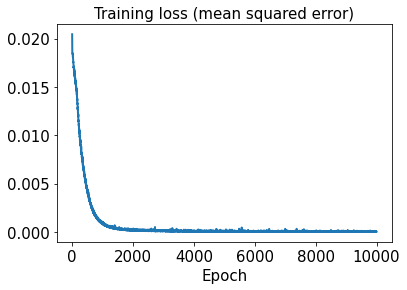

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

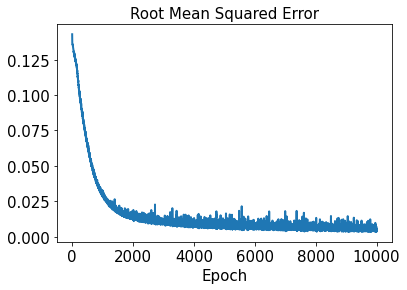

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.0025740014


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.005575118


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

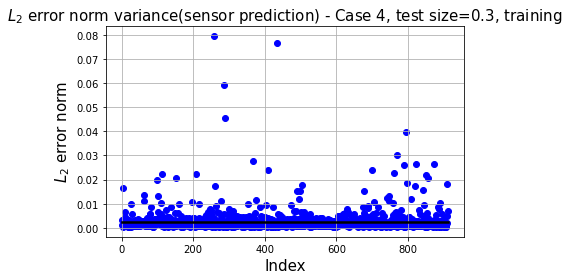

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 4, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

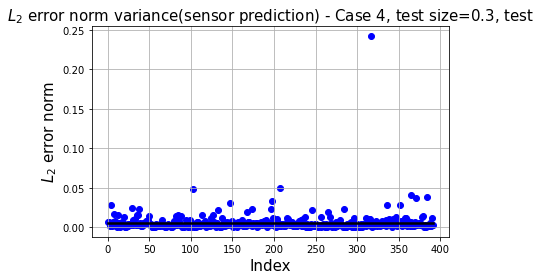

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 4, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1032
Epoch 2/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.1003
Epoch 3/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0082 - rmse: 0.0895
Epoch 4/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0840
Epoch 5/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 6/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0811
Epoch 7/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0782
Epoch 8/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0767
Epoch 9/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0759
Epoch 10/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0750
Epoch 11/10000
23/23 [=======

23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0324
Epoch 85/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0321
Epoch 86/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0318
Epoch 87/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0315
Epoch 88/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 89/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0309
Epoch 90/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0306
Epoch 91/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0303
Epoch 92/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0300
Epoch 93/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0297
Epoch 94/10000
23/23 [=============

23/23 [==============================] - 0s 5ms/step - loss: 4.7072e-04 - rmse: 0.0174
Epoch 165/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6751e-04 - rmse: 0.0173
Epoch 166/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6418e-04 - rmse: 0.0172
Epoch 167/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6113e-04 - rmse: 0.0171
Epoch 168/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5862e-04 - rmse: 0.0171
Epoch 169/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5432e-04 - rmse: 0.0169
Epoch 170/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5170e-04 - rmse: 0.0169
Epoch 171/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4883e-04 - rmse: 0.0168
Epoch 172/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4524e-04 - rmse: 0.0167
Epoch 173/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4230e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 3.0362e-04 - rmse: 0.0119
Epoch 244/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.0412e-04 - rmse: 0.0120
Epoch 245/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.0117e-04 - rmse: 0.0118
Epoch 246/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9989e-04 - rmse: 0.0118
Epoch 247/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9961e-04 - rmse: 0.0118
Epoch 248/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9780e-04 - rmse: 0.0117
Epoch 249/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9777e-04 - rmse: 0.0117
Epoch 250/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9632e-04 - rmse: 0.0117
Epoch 251/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9490e-04 - rmse: 0.0116
Epoch 252/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9372e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 2.3625e-04 - rmse: 0.0092
Epoch 323/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3559e-04 - rmse: 0.0092
Epoch 324/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3583e-04 - rmse: 0.0092
Epoch 325/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3545e-04 - rmse: 0.0092
Epoch 326/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3418e-04 - rmse: 0.0091
Epoch 327/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3362e-04 - rmse: 0.0091
Epoch 328/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3355e-04 - rmse: 0.0091
Epoch 329/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3264e-04 - rmse: 0.0091
Epoch 330/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3207e-04 - rmse: 0.0090
Epoch 331/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3156e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 2.0102e-04 - rmse: 0.0077
Epoch 402/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0024e-04 - rmse: 0.0077
Epoch 403/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0018e-04 - rmse: 0.0077
Epoch 404/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9917e-04 - rmse: 0.0076
Epoch 405/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9815e-04 - rmse: 0.0076
Epoch 406/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9820e-04 - rmse: 0.0076
Epoch 407/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9763e-04 - rmse: 0.0076
Epoch 408/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9710e-04 - rmse: 0.0075
Epoch 409/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9676e-04 - rmse: 0.0075
Epoch 410/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9655e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.7569e-04 - rmse: 0.0067
Epoch 481/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7570e-04 - rmse: 0.0067
Epoch 482/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7558e-04 - rmse: 0.0067
Epoch 483/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7515e-04 - rmse: 0.0067
Epoch 484/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7490e-04 - rmse: 0.0067
Epoch 485/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7434e-04 - rmse: 0.0066
Epoch 486/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7428e-04 - rmse: 0.0066
Epoch 487/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7393e-04 - rmse: 0.0066
Epoch 488/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7353e-04 - rmse: 0.0066
Epoch 489/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7325e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.5830e-04 - rmse: 0.0061
Epoch 560/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5771e-04 - rmse: 0.0060
Epoch 561/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5788e-04 - rmse: 0.0060
Epoch 562/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5819e-04 - rmse: 0.0061
Epoch 563/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5825e-04 - rmse: 0.0061
Epoch 564/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5716e-04 - rmse: 0.0060
Epoch 565/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5691e-04 - rmse: 0.0060
Epoch 566/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5706e-04 - rmse: 0.0060
Epoch 567/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5658e-04 - rmse: 0.0060
Epoch 568/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5653e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.4436e-04 - rmse: 0.0056
Epoch 639/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4411e-04 - rmse: 0.0056
Epoch 640/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4437e-04 - rmse: 0.0056
Epoch 641/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4375e-04 - rmse: 0.0056
Epoch 642/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4337e-04 - rmse: 0.0055
Epoch 643/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4300e-04 - rmse: 0.0055
Epoch 644/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4366e-04 - rmse: 0.0056
Epoch 645/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4289e-04 - rmse: 0.0055
Epoch 646/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4274e-04 - rmse: 0.0055
Epoch 647/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4323e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.3335e-04 - rmse: 0.0053
Epoch 718/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3333e-04 - rmse: 0.0053
Epoch 719/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3293e-04 - rmse: 0.0052
Epoch 720/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3231e-04 - rmse: 0.0052
Epoch 721/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3234e-04 - rmse: 0.0052
Epoch 722/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3203e-04 - rmse: 0.0052
Epoch 723/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3180e-04 - rmse: 0.0052
Epoch 724/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3265e-04 - rmse: 0.0053
Epoch 725/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3147e-04 - rmse: 0.0052
Epoch 726/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3175e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.2403e-04 - rmse: 0.0050
Epoch 797/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2411e-04 - rmse: 0.0050
Epoch 798/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2370e-04 - rmse: 0.0050
Epoch 799/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2365e-04 - rmse: 0.0050
Epoch 800/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2325e-04 - rmse: 0.0050
Epoch 801/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2310e-04 - rmse: 0.0049
Epoch 802/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2377e-04 - rmse: 0.0050
Epoch 803/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2340e-04 - rmse: 0.0050
Epoch 804/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2350e-04 - rmse: 0.0050
Epoch 805/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2300e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.1587e-04 - rmse: 0.0048
Epoch 876/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1560e-04 - rmse: 0.0047
Epoch 877/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1547e-04 - rmse: 0.0047
Epoch 878/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1537e-04 - rmse: 0.0047
Epoch 879/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1517e-04 - rmse: 0.0047
Epoch 880/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1532e-04 - rmse: 0.0047
Epoch 881/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1538e-04 - rmse: 0.0048
Epoch 882/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1544e-04 - rmse: 0.0048
Epoch 883/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1494e-04 - rmse: 0.0047
Epoch 884/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1505e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.0900e-04 - rmse: 0.0046
Epoch 955/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0869e-04 - rmse: 0.0045
Epoch 956/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0881e-04 - rmse: 0.0046
Epoch 957/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0833e-04 - rmse: 0.0045
Epoch 958/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0827e-04 - rmse: 0.0045
Epoch 959/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0884e-04 - rmse: 0.0046
Epoch 960/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0893e-04 - rmse: 0.0046
Epoch 961/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0880e-04 - rmse: 0.0046
Epoch 962/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0854e-04 - rmse: 0.0046
Epoch 963/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0783e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.0286e-04 - rmse: 0.0044
Epoch 1034/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0265e-04 - rmse: 0.0044
Epoch 1035/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0251e-04 - rmse: 0.0044
Epoch 1036/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0231e-04 - rmse: 0.0044
Epoch 1037/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0230e-04 - rmse: 0.0044
Epoch 1038/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0227e-04 - rmse: 0.0044
Epoch 1039/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0224e-04 - rmse: 0.0044
Epoch 1040/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0244e-04 - rmse: 0.0044
Epoch 1041/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0225e-04 - rmse: 0.0044
Epoch 1042/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0

23/23 [==============================] - 0s 5ms/step - loss: 9.7360e-05 - rmse: 0.0042
Epoch 1112/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.7350e-05 - rmse: 0.0042
Epoch 1113/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.7368e-05 - rmse: 0.0042
Epoch 1114/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.7221e-05 - rmse: 0.0042
Epoch 1115/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.7046e-05 - rmse: 0.0042
Epoch 1116/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.7316e-05 - rmse: 0.0043
Epoch 1117/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.7560e-05 - rmse: 0.0043
Epoch 1118/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.8173e-05 - rmse: 0.0044
Epoch 1119/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.7783e-05 - rmse: 0.0043
Epoch 1120/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.7

23/23 [==============================] - 0s 5ms/step - loss: 9.3531e-05 - rmse: 0.0042
Epoch 1190/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.3626e-05 - rmse: 0.0042
Epoch 1191/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2971e-05 - rmse: 0.0041
Epoch 1192/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2701e-05 - rmse: 0.0041
Epoch 1193/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2706e-05 - rmse: 0.0041
Epoch 1194/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2549e-05 - rmse: 0.0041
Epoch 1195/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2265e-05 - rmse: 0.0041
Epoch 1196/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2739e-05 - rmse: 0.0041
Epoch 1197/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.3188e-05 - rmse: 0.0042
Epoch 1198/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2

23/23 [==============================] - 0s 5ms/step - loss: 8.8609e-05 - rmse: 0.0040
Epoch 1268/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8781e-05 - rmse: 0.0040
Epoch 1269/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.9123e-05 - rmse: 0.0041
Epoch 1270/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8888e-05 - rmse: 0.0040
Epoch 1271/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8882e-05 - rmse: 0.0040
Epoch 1272/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8866e-05 - rmse: 0.0040
Epoch 1273/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8575e-05 - rmse: 0.0040
Epoch 1274/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8430e-05 - rmse: 0.0040
Epoch 1275/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8462e-05 - rmse: 0.0040
Epoch 1276/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8

23/23 [==============================] - 0s 5ms/step - loss: 8.5173e-05 - rmse: 0.0039
Epoch 1346/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.4964e-05 - rmse: 0.0039
Epoch 1347/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.5048e-05 - rmse: 0.0039
Epoch 1348/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.4958e-05 - rmse: 0.0039
Epoch 1349/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.5231e-05 - rmse: 0.0039
Epoch 1350/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.5082e-05 - rmse: 0.0039
Epoch 1351/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.6106e-05 - rmse: 0.0040
Epoch 1352/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.6152e-05 - rmse: 0.0041
Epoch 1353/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.5625e-05 - rmse: 0.0040
Epoch 1354/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.5

23/23 [==============================] - 0s 5ms/step - loss: 8.2387e-05 - rmse: 0.0039
Epoch 1424/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.2188e-05 - rmse: 0.0039
Epoch 1425/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1923e-05 - rmse: 0.0038
Epoch 1426/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.2337e-05 - rmse: 0.0039
Epoch 1427/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.2362e-05 - rmse: 0.0039
Epoch 1428/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.3044e-05 - rmse: 0.0040
Epoch 1429/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.3025e-05 - rmse: 0.0040
Epoch 1430/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.2312e-05 - rmse: 0.0039
Epoch 1431/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1961e-05 - rmse: 0.0039
Epoch 1432/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.2

23/23 [==============================] - 0s 5ms/step - loss: 7.9328e-05 - rmse: 0.0038
Epoch 1502/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.9178e-05 - rmse: 0.0038
Epoch 1503/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.9584e-05 - rmse: 0.0038
Epoch 1504/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.9342e-05 - rmse: 0.0038
Epoch 1505/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.9069e-05 - rmse: 0.0038
Epoch 1506/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.9031e-05 - rmse: 0.0038
Epoch 1507/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.9053e-05 - rmse: 0.0038
Epoch 1508/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.9135e-05 - rmse: 0.0038
Epoch 1509/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.9392e-05 - rmse: 0.0038
Epoch 1510/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.8

23/23 [==============================] - 0s 5ms/step - loss: 7.6904e-05 - rmse: 0.0037
Epoch 1580/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.7000e-05 - rmse: 0.0038
Epoch 1581/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6741e-05 - rmse: 0.0037
Epoch 1582/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6970e-05 - rmse: 0.0038
Epoch 1583/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6475e-05 - rmse: 0.0037
Epoch 1584/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6418e-05 - rmse: 0.0037
Epoch 1585/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6347e-05 - rmse: 0.0037
Epoch 1586/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6060e-05 - rmse: 0.0036
Epoch 1587/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.5929e-05 - rmse: 0.0036
Epoch 1588/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6

23/23 [==============================] - 0s 5ms/step - loss: 7.4259e-05 - rmse: 0.0036
Epoch 1658/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4300e-05 - rmse: 0.0036
Epoch 1659/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4266e-05 - rmse: 0.0036
Epoch 1660/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4252e-05 - rmse: 0.0036
Epoch 1661/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4190e-05 - rmse: 0.0036
Epoch 1662/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4824e-05 - rmse: 0.0037
Epoch 1663/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.5584e-05 - rmse: 0.0038
Epoch 1664/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4798e-05 - rmse: 0.0037
Epoch 1665/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4459e-05 - rmse: 0.0037
Epoch 1666/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.3

23/23 [==============================] - 0s 5ms/step - loss: 7.2430e-05 - rmse: 0.0036
Epoch 1736/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.2173e-05 - rmse: 0.0036
Epoch 1737/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.2386e-05 - rmse: 0.0036
Epoch 1738/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.2762e-05 - rmse: 0.0037
Epoch 1739/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.3136e-05 - rmse: 0.0037
Epoch 1740/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.2340e-05 - rmse: 0.0036
Epoch 1741/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.2094e-05 - rmse: 0.0036
Epoch 1742/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.1879e-05 - rmse: 0.0036
Epoch 1743/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.1502e-05 - rmse: 0.0035
Epoch 1744/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.1

23/23 [==============================] - 0s 6ms/step - loss: 6.9606e-05 - rmse: 0.0034
Epoch 1814/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9934e-05 - rmse: 0.0035
Epoch 1815/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.0360e-05 - rmse: 0.0036
Epoch 1816/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.0114e-05 - rmse: 0.0035
Epoch 1817/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9831e-05 - rmse: 0.0035
Epoch 1818/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9512e-05 - rmse: 0.0034
Epoch 1819/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9500e-05 - rmse: 0.0034
Epoch 1820/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9940e-05 - rmse: 0.0035
Epoch 1821/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9897e-05 - rmse: 0.0035
Epoch 1822/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9

23/23 [==============================] - 0s 5ms/step - loss: 6.7952e-05 - rmse: 0.0034
Epoch 1892/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.8472e-05 - rmse: 0.0035
Epoch 1893/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.8383e-05 - rmse: 0.0035
Epoch 1894/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.8845e-05 - rmse: 0.0036
Epoch 1895/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.8678e-05 - rmse: 0.0035
Epoch 1896/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.8138e-05 - rmse: 0.0035
Epoch 1897/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.7718e-05 - rmse: 0.0034
Epoch 1898/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.7971e-05 - rmse: 0.0034
Epoch 1899/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.8020e-05 - rmse: 0.0034
Epoch 1900/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.8

23/23 [==============================] - 0s 5ms/step - loss: 6.7037e-05 - rmse: 0.0035
Epoch 1970/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6578e-05 - rmse: 0.0034
Epoch 1971/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6499e-05 - rmse: 0.0034
Epoch 1972/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6969e-05 - rmse: 0.0035
Epoch 1973/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6602e-05 - rmse: 0.0034
Epoch 1974/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6446e-05 - rmse: 0.0034
Epoch 1975/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6374e-05 - rmse: 0.0034
Epoch 1976/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6303e-05 - rmse: 0.0034
Epoch 1977/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6108e-05 - rmse: 0.0034
Epoch 1978/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6

23/23 [==============================] - 0s 5ms/step - loss: 6.5113e-05 - rmse: 0.0034
Epoch 2048/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.5406e-05 - rmse: 0.0034
Epoch 2049/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.5134e-05 - rmse: 0.0034
Epoch 2050/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.5659e-05 - rmse: 0.0035
Epoch 2051/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.5217e-05 - rmse: 0.0034
Epoch 2052/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4941e-05 - rmse: 0.0034
Epoch 2053/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4931e-05 - rmse: 0.0034
Epoch 2054/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4481e-05 - rmse: 0.0033
Epoch 2055/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4692e-05 - rmse: 0.0033
Epoch 2056/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4

23/23 [==============================] - 0s 5ms/step - loss: 6.3554e-05 - rmse: 0.0033
Epoch 2126/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3735e-05 - rmse: 0.0033
Epoch 2127/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3973e-05 - rmse: 0.0034
Epoch 2128/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3701e-05 - rmse: 0.0033
Epoch 2129/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3651e-05 - rmse: 0.0033
Epoch 2130/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3465e-05 - rmse: 0.0033
Epoch 2131/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3193e-05 - rmse: 0.0033
Epoch 2132/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3113e-05 - rmse: 0.0033
Epoch 2133/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3230e-05 - rmse: 0.0033
Epoch 2134/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3

23/23 [==============================] - 0s 5ms/step - loss: 6.1906e-05 - rmse: 0.0032
Epoch 2204/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1999e-05 - rmse: 0.0032
Epoch 2205/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1809e-05 - rmse: 0.0032
Epoch 2206/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.2340e-05 - rmse: 0.0033
Epoch 2207/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.2361e-05 - rmse: 0.0033
Epoch 2208/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.2034e-05 - rmse: 0.0033
Epoch 2209/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.2116e-05 - rmse: 0.0033
Epoch 2210/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1984e-05 - rmse: 0.0033
Epoch 2211/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1688e-05 - rmse: 0.0032
Epoch 2212/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1

23/23 [==============================] - 0s 5ms/step - loss: 6.1184e-05 - rmse: 0.0033
Epoch 2282/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0938e-05 - rmse: 0.0032
Epoch 2283/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0916e-05 - rmse: 0.0032
Epoch 2284/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0686e-05 - rmse: 0.0032
Epoch 2285/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0743e-05 - rmse: 0.0032
Epoch 2286/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0857e-05 - rmse: 0.0032
Epoch 2287/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0517e-05 - rmse: 0.0032
Epoch 2288/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0439e-05 - rmse: 0.0032
Epoch 2289/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0718e-05 - rmse: 0.0032
Epoch 2290/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0

23/23 [==============================] - 0s 5ms/step - loss: 5.9833e-05 - rmse: 0.0032
Epoch 2360/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9595e-05 - rmse: 0.0032
Epoch 2361/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9574e-05 - rmse: 0.0032
Epoch 2362/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9748e-05 - rmse: 0.0032
Epoch 2363/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9880e-05 - rmse: 0.0032
Epoch 2364/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9539e-05 - rmse: 0.0032
Epoch 2365/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9563e-05 - rmse: 0.0032
Epoch 2366/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9381e-05 - rmse: 0.0031
Epoch 2367/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9316e-05 - rmse: 0.0031
Epoch 2368/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0

23/23 [==============================] - 0s 5ms/step - loss: 5.8314e-05 - rmse: 0.0031
Epoch 2438/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8220e-05 - rmse: 0.0031
Epoch 2439/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8239e-05 - rmse: 0.0031
Epoch 2440/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8244e-05 - rmse: 0.0031
Epoch 2441/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8365e-05 - rmse: 0.0031
Epoch 2442/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9080e-05 - rmse: 0.0032
Epoch 2443/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8967e-05 - rmse: 0.0032
Epoch 2444/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8968e-05 - rmse: 0.0032
Epoch 2445/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8518e-05 - rmse: 0.0031
Epoch 2446/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8

23/23 [==============================] - 0s 5ms/step - loss: 5.7540e-05 - rmse: 0.0031
Epoch 2516/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8248e-05 - rmse: 0.0032
Epoch 2517/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8117e-05 - rmse: 0.0032
Epoch 2518/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7650e-05 - rmse: 0.0031
Epoch 2519/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7449e-05 - rmse: 0.0031
Epoch 2520/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7319e-05 - rmse: 0.0031
Epoch 2521/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7239e-05 - rmse: 0.0031
Epoch 2522/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7590e-05 - rmse: 0.0031
Epoch 2523/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8154e-05 - rmse: 0.0032
Epoch 2524/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7

23/23 [==============================] - 0s 5ms/step - loss: 5.6839e-05 - rmse: 0.0031
Epoch 2594/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6500e-05 - rmse: 0.0031
Epoch 2595/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6660e-05 - rmse: 0.0031
Epoch 2596/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6612e-05 - rmse: 0.0031
Epoch 2597/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6378e-05 - rmse: 0.0030
Epoch 2598/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6389e-05 - rmse: 0.0030
Epoch 2599/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6380e-05 - rmse: 0.0030
Epoch 2600/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6657e-05 - rmse: 0.0031
Epoch 2601/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6276e-05 - rmse: 0.0030
Epoch 2602/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5

23/23 [==============================] - 0s 5ms/step - loss: 5.5717e-05 - rmse: 0.0030
Epoch 2672/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5851e-05 - rmse: 0.0031
Epoch 2673/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5955e-05 - rmse: 0.0031
Epoch 2674/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5702e-05 - rmse: 0.0030
Epoch 2675/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5725e-05 - rmse: 0.0030
Epoch 2676/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5993e-05 - rmse: 0.0031
Epoch 2677/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5637e-05 - rmse: 0.0030
Epoch 2678/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6578e-05 - rmse: 0.0032
Epoch 2679/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6111e-05 - rmse: 0.0031
Epoch 2680/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5

23/23 [==============================] - 0s 5ms/step - loss: 5.4889e-05 - rmse: 0.0030
Epoch 2750/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4932e-05 - rmse: 0.0030
Epoch 2751/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4905e-05 - rmse: 0.0030
Epoch 2752/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5004e-05 - rmse: 0.0030
Epoch 2753/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5159e-05 - rmse: 0.0031
Epoch 2754/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4648e-05 - rmse: 0.0030
Epoch 2755/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4547e-05 - rmse: 0.0030
Epoch 2756/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4554e-05 - rmse: 0.0030
Epoch 2757/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5183e-05 - rmse: 0.0031
Epoch 2758/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4

23/23 [==============================] - 0s 5ms/step - loss: 5.4091e-05 - rmse: 0.0030
Epoch 2828/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4265e-05 - rmse: 0.0030
Epoch 2829/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3880e-05 - rmse: 0.0030
Epoch 2830/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4259e-05 - rmse: 0.0030
Epoch 2831/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4484e-05 - rmse: 0.0031
Epoch 2832/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4382e-05 - rmse: 0.0030
Epoch 2833/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3989e-05 - rmse: 0.0030
Epoch 2834/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3951e-05 - rmse: 0.0030
Epoch 2835/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3936e-05 - rmse: 0.0030
Epoch 2836/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3

23/23 [==============================] - 0s 5ms/step - loss: 5.3157e-05 - rmse: 0.0029
Epoch 2906/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4099e-05 - rmse: 0.0031
Epoch 2907/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4089e-05 - rmse: 0.0031
Epoch 2908/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3410e-05 - rmse: 0.0030
Epoch 2909/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3879e-05 - rmse: 0.0031
Epoch 2910/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3489e-05 - rmse: 0.0030
Epoch 2911/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3142e-05 - rmse: 0.0029
Epoch 2912/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3436e-05 - rmse: 0.0030
Epoch 2913/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3164e-05 - rmse: 0.0029
Epoch 2914/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3

23/23 [==============================] - 0s 5ms/step - loss: 5.2235e-05 - rmse: 0.0029
Epoch 2984/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2313e-05 - rmse: 0.0029
Epoch 2985/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2323e-05 - rmse: 0.0029
Epoch 2986/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2525e-05 - rmse: 0.0029
Epoch 2987/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2565e-05 - rmse: 0.0029
Epoch 2988/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2775e-05 - rmse: 0.0030
Epoch 2989/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3100e-05 - rmse: 0.0030
Epoch 2990/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2424e-05 - rmse: 0.0029
Epoch 2991/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2468e-05 - rmse: 0.0029
Epoch 2992/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2

23/23 [==============================] - 0s 5ms/step - loss: 5.2571e-05 - rmse: 0.0030
Epoch 3062/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1925e-05 - rmse: 0.0029
Epoch 3063/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2118e-05 - rmse: 0.0029
Epoch 3064/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2736e-05 - rmse: 0.0030
Epoch 3065/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2620e-05 - rmse: 0.0030
Epoch 3066/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2046e-05 - rmse: 0.0029
Epoch 3067/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2514e-05 - rmse: 0.0030
Epoch 3068/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2931e-05 - rmse: 0.0031
Epoch 3069/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2511e-05 - rmse: 0.0030
Epoch 3070/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2

23/23 [==============================] - 0s 5ms/step - loss: 5.1486e-05 - rmse: 0.0029
Epoch 3140/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1327e-05 - rmse: 0.0029
Epoch 3141/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1152e-05 - rmse: 0.0029
Epoch 3142/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1029e-05 - rmse: 0.0028
Epoch 3143/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2109e-05 - rmse: 0.0030
Epoch 3144/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1772e-05 - rmse: 0.0030
Epoch 3145/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1747e-05 - rmse: 0.0030
Epoch 3146/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1493e-05 - rmse: 0.0029
Epoch 3147/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1976e-05 - rmse: 0.0030
Epoch 3148/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1

23/23 [==============================] - 0s 5ms/step - loss: 5.1563e-05 - rmse: 0.0030
Epoch 3218/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0922e-05 - rmse: 0.0029
Epoch 3219/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0726e-05 - rmse: 0.0029
Epoch 3220/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0627e-05 - rmse: 0.0029
Epoch 3221/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0551e-05 - rmse: 0.0028
Epoch 3222/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0719e-05 - rmse: 0.0029
Epoch 3223/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0963e-05 - rmse: 0.0029
Epoch 3224/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0785e-05 - rmse: 0.0029
Epoch 3225/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0492e-05 - rmse: 0.0028
Epoch 3226/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1

23/23 [==============================] - 0s 5ms/step - loss: 5.0363e-05 - rmse: 0.0029
Epoch 3296/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0423e-05 - rmse: 0.0029
Epoch 3297/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0442e-05 - rmse: 0.0029
Epoch 3298/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0047e-05 - rmse: 0.0028
Epoch 3299/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0149e-05 - rmse: 0.0029
Epoch 3300/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9986e-05 - rmse: 0.0028
Epoch 3301/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9746e-05 - rmse: 0.0028
Epoch 3302/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0164e-05 - rmse: 0.0029
Epoch 3303/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0460e-05 - rmse: 0.0029
Epoch 3304/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0

23/23 [==============================] - 0s 5ms/step - loss: 4.9814e-05 - rmse: 0.0029
Epoch 3374/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9372e-05 - rmse: 0.0028
Epoch 3375/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9131e-05 - rmse: 0.0027
Epoch 3376/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9208e-05 - rmse: 0.0028
Epoch 3377/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9726e-05 - rmse: 0.0029
Epoch 3378/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9989e-05 - rmse: 0.0029
Epoch 3379/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9443e-05 - rmse: 0.0028
Epoch 3380/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9786e-05 - rmse: 0.0029
Epoch 3381/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9700e-05 - rmse: 0.0029
Epoch 3382/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0

23/23 [==============================] - 0s 5ms/step - loss: 4.9397e-05 - rmse: 0.0029
Epoch 3452/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8992e-05 - rmse: 0.0028
Epoch 3453/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9157e-05 - rmse: 0.0028
Epoch 3454/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9629e-05 - rmse: 0.0029
Epoch 3455/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9432e-05 - rmse: 0.0029
Epoch 3456/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9272e-05 - rmse: 0.0028
Epoch 3457/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9448e-05 - rmse: 0.0029
Epoch 3458/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9170e-05 - rmse: 0.0028
Epoch 3459/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8956e-05 - rmse: 0.0028
Epoch 3460/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8

23/23 [==============================] - 0s 5ms/step - loss: 4.8665e-05 - rmse: 0.0028
Epoch 3530/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8554e-05 - rmse: 0.0028
Epoch 3531/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8155e-05 - rmse: 0.0027
Epoch 3532/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8225e-05 - rmse: 0.0027
Epoch 3533/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8235e-05 - rmse: 0.0027
Epoch 3534/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8134e-05 - rmse: 0.0027
Epoch 3535/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8146e-05 - rmse: 0.0027
Epoch 3536/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8126e-05 - rmse: 0.0027
Epoch 3537/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8682e-05 - rmse: 0.0028
Epoch 3538/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8

23/23 [==============================] - 0s 5ms/step - loss: 4.8192e-05 - rmse: 0.0028
Epoch 3608/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8129e-05 - rmse: 0.0028
Epoch 3609/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8064e-05 - rmse: 0.0028
Epoch 3610/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8076e-05 - rmse: 0.0028
Epoch 3611/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8305e-05 - rmse: 0.0028
Epoch 3612/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8131e-05 - rmse: 0.0028
Epoch 3613/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7798e-05 - rmse: 0.0027
Epoch 3614/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8260e-05 - rmse: 0.0028
Epoch 3615/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8217e-05 - rmse: 0.0028
Epoch 3616/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8

23/23 [==============================] - 0s 5ms/step - loss: 4.7807e-05 - rmse: 0.0028
Epoch 3686/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7550e-05 - rmse: 0.0027
Epoch 3687/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8142e-05 - rmse: 0.0028
Epoch 3688/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8206e-05 - rmse: 0.0029
Epoch 3689/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7568e-05 - rmse: 0.0027
Epoch 3690/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7383e-05 - rmse: 0.0027
Epoch 3691/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7651e-05 - rmse: 0.0028
Epoch 3692/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8006e-05 - rmse: 0.0028
Epoch 3693/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7969e-05 - rmse: 0.0028
Epoch 3694/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7

23/23 [==============================] - 0s 6ms/step - loss: 4.7386e-05 - rmse: 0.0028
Epoch 3764/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7474e-05 - rmse: 0.0028
Epoch 3765/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7294e-05 - rmse: 0.0028
Epoch 3766/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7147e-05 - rmse: 0.0027
Epoch 3767/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7438e-05 - rmse: 0.0028
Epoch 3768/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7634e-05 - rmse: 0.0028
Epoch 3769/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7430e-05 - rmse: 0.0028
Epoch 3770/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7054e-05 - rmse: 0.0027
Epoch 3771/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6959e-05 - rmse: 0.0027
Epoch 3772/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6

23/23 [==============================] - 0s 6ms/step - loss: 4.6805e-05 - rmse: 0.0027
Epoch 3842/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.6880e-05 - rmse: 0.0027
Epoch 3843/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.7079e-05 - rmse: 0.0028
Epoch 3844/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7049e-05 - rmse: 0.0028
Epoch 3845/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6706e-05 - rmse: 0.0027
Epoch 3846/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6812e-05 - rmse: 0.0027
Epoch 3847/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.7056e-05 - rmse: 0.0028
Epoch 3848/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.7574e-05 - rmse: 0.0029
Epoch 3849/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6948e-05 - rmse: 0.0028
Epoch 3850/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6

23/23 [==============================] - 0s 5ms/step - loss: 4.6170e-05 - rmse: 0.0027
Epoch 3920/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6096e-05 - rmse: 0.0027
Epoch 3921/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6556e-05 - rmse: 0.0027
Epoch 3922/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6576e-05 - rmse: 0.0027
Epoch 3923/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7700e-05 - rmse: 0.0029
Epoch 3924/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7004e-05 - rmse: 0.0028
Epoch 3925/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6822e-05 - rmse: 0.0028
Epoch 3926/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7234e-05 - rmse: 0.0029
Epoch 3927/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7287e-05 - rmse: 0.0029
Epoch 3928/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6

23/23 [==============================] - 0s 5ms/step - loss: 4.6345e-05 - rmse: 0.0028
Epoch 3998/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6356e-05 - rmse: 0.0028
Epoch 3999/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6037e-05 - rmse: 0.0027
Epoch 4000/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6403e-05 - rmse: 0.0028
Epoch 4001/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6041e-05 - rmse: 0.0027
Epoch 4002/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5819e-05 - rmse: 0.0027
Epoch 4003/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5680e-05 - rmse: 0.0026
Epoch 4004/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5746e-05 - rmse: 0.0026
Epoch 4005/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5824e-05 - rmse: 0.0027
Epoch 4006/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6

23/23 [==============================] - 0s 5ms/step - loss: 4.5779e-05 - rmse: 0.0027
Epoch 4076/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5660e-05 - rmse: 0.0027
Epoch 4077/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5334e-05 - rmse: 0.0026
Epoch 4078/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5898e-05 - rmse: 0.0027
Epoch 4079/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6115e-05 - rmse: 0.0028
Epoch 4080/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6335e-05 - rmse: 0.0028
Epoch 4081/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6224e-05 - rmse: 0.0028
Epoch 4082/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5872e-05 - rmse: 0.0027
Epoch 4083/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5701e-05 - rmse: 0.0027
Epoch 4084/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6

23/23 [==============================] - 0s 5ms/step - loss: 4.5071e-05 - rmse: 0.0026
Epoch 4154/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4960e-05 - rmse: 0.0026
Epoch 4155/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5621e-05 - rmse: 0.0027
Epoch 4156/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5466e-05 - rmse: 0.0027
Epoch 4157/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5824e-05 - rmse: 0.0028
Epoch 4158/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5542e-05 - rmse: 0.0027
Epoch 4159/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5217e-05 - rmse: 0.0027
Epoch 4160/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5641e-05 - rmse: 0.0027
Epoch 4161/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5224e-05 - rmse: 0.0027
Epoch 4162/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5

23/23 [==============================] - 0s 5ms/step - loss: 4.4605e-05 - rmse: 0.0026
Epoch 4232/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4726e-05 - rmse: 0.0026
Epoch 4233/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4577e-05 - rmse: 0.0026
Epoch 4234/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4665e-05 - rmse: 0.0026
Epoch 4235/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4555e-05 - rmse: 0.0026
Epoch 4236/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4585e-05 - rmse: 0.0026
Epoch 4237/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4679e-05 - rmse: 0.0026
Epoch 4238/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4734e-05 - rmse: 0.0026
Epoch 4239/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4841e-05 - rmse: 0.0026
Epoch 4240/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4

23/23 [==============================] - 0s 5ms/step - loss: 4.4329e-05 - rmse: 0.0026
Epoch 4310/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4517e-05 - rmse: 0.0026
Epoch 4311/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4487e-05 - rmse: 0.0026
Epoch 4312/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4642e-05 - rmse: 0.0026
Epoch 4313/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4325e-05 - rmse: 0.0026
Epoch 4314/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4340e-05 - rmse: 0.0026
Epoch 4315/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4291e-05 - rmse: 0.0026
Epoch 4316/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4619e-05 - rmse: 0.0026
Epoch 4317/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4307e-05 - rmse: 0.0026
Epoch 4318/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4

23/23 [==============================] - 0s 5ms/step - loss: 4.5184e-05 - rmse: 0.0028
Epoch 4388/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4975e-05 - rmse: 0.0028
Epoch 4389/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4559e-05 - rmse: 0.0027
Epoch 4390/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4302e-05 - rmse: 0.0026
Epoch 4391/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4268e-05 - rmse: 0.0026
Epoch 4392/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4381e-05 - rmse: 0.0026
Epoch 4393/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4396e-05 - rmse: 0.0026
Epoch 4394/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4583e-05 - rmse: 0.0027
Epoch 4395/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4445e-05 - rmse: 0.0027
Epoch 4396/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4

23/23 [==============================] - 0s 5ms/step - loss: 4.4015e-05 - rmse: 0.0026
Epoch 4466/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3633e-05 - rmse: 0.0025
Epoch 4467/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3924e-05 - rmse: 0.0026
Epoch 4468/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4445e-05 - rmse: 0.0027
Epoch 4469/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4152e-05 - rmse: 0.0026
Epoch 4470/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3939e-05 - rmse: 0.0026
Epoch 4471/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3770e-05 - rmse: 0.0026
Epoch 4472/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3866e-05 - rmse: 0.0026
Epoch 4473/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3724e-05 - rmse: 0.0026
Epoch 4474/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3

23/23 [==============================] - 0s 5ms/step - loss: 4.3606e-05 - rmse: 0.0026
Epoch 4544/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3934e-05 - rmse: 0.0026
Epoch 4545/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3843e-05 - rmse: 0.0026
Epoch 4546/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3794e-05 - rmse: 0.0026
Epoch 4547/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3621e-05 - rmse: 0.0026
Epoch 4548/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3519e-05 - rmse: 0.0026
Epoch 4549/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3250e-05 - rmse: 0.0025
Epoch 4550/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3201e-05 - rmse: 0.0025
Epoch 4551/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3265e-05 - rmse: 0.0025
Epoch 4552/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3

23/23 [==============================] - 0s 5ms/step - loss: 4.3446e-05 - rmse: 0.0026
Epoch 4622/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3180e-05 - rmse: 0.0025
Epoch 4623/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3193e-05 - rmse: 0.0026
Epoch 4624/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2997e-05 - rmse: 0.0025
Epoch 4625/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3204e-05 - rmse: 0.0026
Epoch 4626/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3214e-05 - rmse: 0.0026
Epoch 4627/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3629e-05 - rmse: 0.0026
Epoch 4628/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3580e-05 - rmse: 0.0026
Epoch 4629/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3489e-05 - rmse: 0.0026
Epoch 4630/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3

23/23 [==============================] - 0s 5ms/step - loss: 4.3193e-05 - rmse: 0.0026
Epoch 4700/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2884e-05 - rmse: 0.0025
Epoch 4701/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3031e-05 - rmse: 0.0026
Epoch 4702/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3147e-05 - rmse: 0.0026
Epoch 4703/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3027e-05 - rmse: 0.0026
Epoch 4704/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2811e-05 - rmse: 0.0025
Epoch 4705/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2938e-05 - rmse: 0.0025
Epoch 4706/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2959e-05 - rmse: 0.0026
Epoch 4707/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3304e-05 - rmse: 0.0026
Epoch 4708/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3

23/23 [==============================] - 0s 5ms/step - loss: 4.2634e-05 - rmse: 0.0025
Epoch 4778/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2694e-05 - rmse: 0.0025
Epoch 4779/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2838e-05 - rmse: 0.0026
Epoch 4780/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2569e-05 - rmse: 0.0025
Epoch 4781/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2730e-05 - rmse: 0.0025
Epoch 4782/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2801e-05 - rmse: 0.0026
Epoch 4783/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2639e-05 - rmse: 0.0025
Epoch 4784/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2677e-05 - rmse: 0.0025
Epoch 4785/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2815e-05 - rmse: 0.0026
Epoch 4786/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3

23/23 [==============================] - 0s 5ms/step - loss: 4.3091e-05 - rmse: 0.0027
Epoch 4856/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2924e-05 - rmse: 0.0026
Epoch 4857/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2600e-05 - rmse: 0.0026
Epoch 4858/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2640e-05 - rmse: 0.0026
Epoch 4859/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2414e-05 - rmse: 0.0025
Epoch 4860/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2366e-05 - rmse: 0.0025
Epoch 4861/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2798e-05 - rmse: 0.0026
Epoch 4862/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2555e-05 - rmse: 0.0026
Epoch 4863/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2662e-05 - rmse: 0.0026
Epoch 4864/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2

23/23 [==============================] - 0s 5ms/step - loss: 4.2544e-05 - rmse: 0.0026
Epoch 4934/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2784e-05 - rmse: 0.0026
Epoch 4935/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2584e-05 - rmse: 0.0026
Epoch 4936/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2715e-05 - rmse: 0.0026
Epoch 4937/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3430e-05 - rmse: 0.0028
Epoch 4938/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2445e-05 - rmse: 0.0026
Epoch 4939/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2380e-05 - rmse: 0.0026
Epoch 4940/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2211e-05 - rmse: 0.0025
Epoch 4941/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2511e-05 - rmse: 0.0026
Epoch 4942/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2

23/23 [==============================] - 0s 5ms/step - loss: 4.2185e-05 - rmse: 0.0026
Epoch 5012/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2150e-05 - rmse: 0.0026
Epoch 5013/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1957e-05 - rmse: 0.0025
Epoch 5014/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2109e-05 - rmse: 0.0025
Epoch 5015/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2279e-05 - rmse: 0.0026
Epoch 5016/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2125e-05 - rmse: 0.0025
Epoch 5017/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1757e-05 - rmse: 0.0025
Epoch 5018/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1575e-05 - rmse: 0.0024
Epoch 5019/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1677e-05 - rmse: 0.0025
Epoch 5020/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1

23/23 [==============================] - 0s 5ms/step - loss: 4.2659e-05 - rmse: 0.0027
Epoch 5090/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2494e-05 - rmse: 0.0027
Epoch 5091/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1977e-05 - rmse: 0.0026
Epoch 5092/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1639e-05 - rmse: 0.0025
Epoch 5093/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1730e-05 - rmse: 0.0025
Epoch 5094/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1781e-05 - rmse: 0.0025
Epoch 5095/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1731e-05 - rmse: 0.0025
Epoch 5096/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1904e-05 - rmse: 0.0025
Epoch 5097/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1521e-05 - rmse: 0.0025
Epoch 5098/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1

23/23 [==============================] - 0s 5ms/step - loss: 4.2329e-05 - rmse: 0.0027
Epoch 5168/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1702e-05 - rmse: 0.0025
Epoch 5169/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1263e-05 - rmse: 0.0024
Epoch 5170/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1252e-05 - rmse: 0.0024
Epoch 5171/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2083e-05 - rmse: 0.0026
Epoch 5172/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3073e-05 - rmse: 0.0028
Epoch 5173/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4253e-05 - rmse: 0.0030
Epoch 5174/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2763e-05 - rmse: 0.0027
Epoch 5175/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1882e-05 - rmse: 0.0026
Epoch 5176/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1

23/23 [==============================] - 0s 5ms/step - loss: 4.1781e-05 - rmse: 0.0026
Epoch 5246/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1238e-05 - rmse: 0.0025
Epoch 5247/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1103e-05 - rmse: 0.0025
Epoch 5248/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1041e-05 - rmse: 0.0024
Epoch 5249/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0956e-05 - rmse: 0.0024
Epoch 5250/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1327e-05 - rmse: 0.0025
Epoch 5251/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1238e-05 - rmse: 0.0025
Epoch 5252/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1333e-05 - rmse: 0.0025
Epoch 5253/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1246e-05 - rmse: 0.0025
Epoch 5254/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1

23/23 [==============================] - 0s 5ms/step - loss: 4.1190e-05 - rmse: 0.0025
Epoch 5324/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1154e-05 - rmse: 0.0025
Epoch 5325/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1170e-05 - rmse: 0.0025
Epoch 5326/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1354e-05 - rmse: 0.0025
Epoch 5327/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1059e-05 - rmse: 0.0025
Epoch 5328/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1161e-05 - rmse: 0.0025
Epoch 5329/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0830e-05 - rmse: 0.0024
Epoch 5330/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0693e-05 - rmse: 0.0024
Epoch 5331/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1666e-05 - rmse: 0.0026
Epoch 5332/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2

23/23 [==============================] - 0s 5ms/step - loss: 4.1199e-05 - rmse: 0.0025
Epoch 5402/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1687e-05 - rmse: 0.0026
Epoch 5403/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1356e-05 - rmse: 0.0026
Epoch 5404/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1414e-05 - rmse: 0.0026
Epoch 5405/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1079e-05 - rmse: 0.0025
Epoch 5406/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0681e-05 - rmse: 0.0024
Epoch 5407/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0729e-05 - rmse: 0.0024
Epoch 5408/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0735e-05 - rmse: 0.0025
Epoch 5409/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0446e-05 - rmse: 0.0024
Epoch 5410/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 4.0443e-05 - rmse: 0.0024
Epoch 5480/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0459e-05 - rmse: 0.0024
Epoch 5481/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0437e-05 - rmse: 0.0024
Epoch 5482/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0873e-05 - rmse: 0.0025
Epoch 5483/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1079e-05 - rmse: 0.0026
Epoch 5484/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0606e-05 - rmse: 0.0025
Epoch 5485/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0482e-05 - rmse: 0.0024
Epoch 5486/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0597e-05 - rmse: 0.0025
Epoch 5487/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0975e-05 - rmse: 0.0025
Epoch 5488/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 4.0118e-05 - rmse: 0.0024
Epoch 5558/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0434e-05 - rmse: 0.0025
Epoch 5559/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0717e-05 - rmse: 0.0025
Epoch 5560/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0507e-05 - rmse: 0.0025
Epoch 5561/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0636e-05 - rmse: 0.0025
Epoch 5562/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0476e-05 - rmse: 0.0025
Epoch 5563/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0481e-05 - rmse: 0.0025
Epoch 5564/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0339e-05 - rmse: 0.0024
Epoch 5565/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0121e-05 - rmse: 0.0024
Epoch 5566/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 4.0161e-05 - rmse: 0.0024
Epoch 5636/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0633e-05 - rmse: 0.0025
Epoch 5637/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9992e-05 - rmse: 0.0024
Epoch 5638/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9705e-05 - rmse: 0.0023
Epoch 5639/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0313e-05 - rmse: 0.0025
Epoch 5640/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0007e-05 - rmse: 0.0024
Epoch 5641/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9845e-05 - rmse: 0.0024
Epoch 5642/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0220e-05 - rmse: 0.0024
Epoch 5643/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0267e-05 - rmse: 0.0025
Epoch 5644/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 4.0230e-05 - rmse: 0.0025
Epoch 5714/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9868e-05 - rmse: 0.0024
Epoch 5715/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9794e-05 - rmse: 0.0024
Epoch 5716/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9895e-05 - rmse: 0.0024
Epoch 5717/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9632e-05 - rmse: 0.0024
Epoch 5718/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9683e-05 - rmse: 0.0024
Epoch 5719/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9720e-05 - rmse: 0.0024
Epoch 5720/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9883e-05 - rmse: 0.0024
Epoch 5721/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0211e-05 - rmse: 0.0025
Epoch 5722/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 3.9938e-05 - rmse: 0.0024
Epoch 5792/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9925e-05 - rmse: 0.0024
Epoch 5793/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0101e-05 - rmse: 0.0025
Epoch 5794/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9998e-05 - rmse: 0.0025
Epoch 5795/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9853e-05 - rmse: 0.0024
Epoch 5796/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9692e-05 - rmse: 0.0024
Epoch 5797/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9535e-05 - rmse: 0.0024
Epoch 5798/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0083e-05 - rmse: 0.0025
Epoch 5799/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0215e-05 - rmse: 0.0025
Epoch 5800/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 4.0370e-05 - rmse: 0.0026
Epoch 5870/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9708e-05 - rmse: 0.0024
Epoch 5871/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9771e-05 - rmse: 0.0024
Epoch 5872/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9730e-05 - rmse: 0.0024
Epoch 5873/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9796e-05 - rmse: 0.0024
Epoch 5874/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9952e-05 - rmse: 0.0025
Epoch 5875/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0020e-05 - rmse: 0.0025
Epoch 5876/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9684e-05 - rmse: 0.0024
Epoch 5877/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9608e-05 - rmse: 0.0024
Epoch 5878/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 5ms/step - loss: 3.9850e-05 - rmse: 0.0025
Epoch 5948/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9471e-05 - rmse: 0.0024
Epoch 5949/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9780e-05 - rmse: 0.0025
Epoch 5950/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9556e-05 - rmse: 0.0024
Epoch 5951/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9162e-05 - rmse: 0.0023
Epoch 5952/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9084e-05 - rmse: 0.0023
Epoch 5953/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9225e-05 - rmse: 0.0024
Epoch 5954/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9271e-05 - rmse: 0.0024
Epoch 5955/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9181e-05 - rmse: 0.0024
Epoch 5956/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 5ms/step - loss: 3.9279e-05 - rmse: 0.0024
Epoch 6026/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9183e-05 - rmse: 0.0024
Epoch 6027/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9267e-05 - rmse: 0.0024
Epoch 6028/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9561e-05 - rmse: 0.0025
Epoch 6029/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9404e-05 - rmse: 0.0024
Epoch 6030/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9177e-05 - rmse: 0.0024
Epoch 6031/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9033e-05 - rmse: 0.0023
Epoch 6032/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8892e-05 - rmse: 0.0023
Epoch 6033/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9198e-05 - rmse: 0.0024
Epoch 6034/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 5ms/step - loss: 3.9541e-05 - rmse: 0.0025
Epoch 6104/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9306e-05 - rmse: 0.0024
Epoch 6105/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9137e-05 - rmse: 0.0024
Epoch 6106/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9212e-05 - rmse: 0.0024
Epoch 6107/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9297e-05 - rmse: 0.0024
Epoch 6108/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9327e-05 - rmse: 0.0024
Epoch 6109/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9315e-05 - rmse: 0.0024
Epoch 6110/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9103e-05 - rmse: 0.0024
Epoch 6111/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8691e-05 - rmse: 0.0023
Epoch 6112/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8

23/23 [==============================] - 0s 5ms/step - loss: 3.8885e-05 - rmse: 0.0024
Epoch 6182/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8967e-05 - rmse: 0.0024
Epoch 6183/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8777e-05 - rmse: 0.0024
Epoch 6184/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8651e-05 - rmse: 0.0023
Epoch 6185/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8633e-05 - rmse: 0.0023
Epoch 6186/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8676e-05 - rmse: 0.0023
Epoch 6187/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8756e-05 - rmse: 0.0023
Epoch 6188/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9009e-05 - rmse: 0.0024
Epoch 6189/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9113e-05 - rmse: 0.0024
Epoch 6190/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8

23/23 [==============================] - 0s 5ms/step - loss: 3.8828e-05 - rmse: 0.0024
Epoch 6260/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8586e-05 - rmse: 0.0023
Epoch 6261/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8681e-05 - rmse: 0.0024
Epoch 6262/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8533e-05 - rmse: 0.0023
Epoch 6263/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8655e-05 - rmse: 0.0024
Epoch 6264/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8574e-05 - rmse: 0.0023
Epoch 6265/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8785e-05 - rmse: 0.0024
Epoch 6266/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8841e-05 - rmse: 0.0024
Epoch 6267/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9200e-05 - rmse: 0.0025
Epoch 6268/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 5ms/step - loss: 3.8852e-05 - rmse: 0.0024
Epoch 6338/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9013e-05 - rmse: 0.0025
Epoch 6339/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8986e-05 - rmse: 0.0024
Epoch 6340/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8853e-05 - rmse: 0.0024
Epoch 6341/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8645e-05 - rmse: 0.0024
Epoch 6342/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8720e-05 - rmse: 0.0024
Epoch 6343/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8977e-05 - rmse: 0.0024
Epoch 6344/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8520e-05 - rmse: 0.0024
Epoch 6345/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8333e-05 - rmse: 0.0023
Epoch 6346/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8

23/23 [==============================] - 0s 5ms/step - loss: 3.8204e-05 - rmse: 0.0023
Epoch 6416/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8531e-05 - rmse: 0.0024
Epoch 6417/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8401e-05 - rmse: 0.0024
Epoch 6418/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8314e-05 - rmse: 0.0023
Epoch 6419/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8459e-05 - rmse: 0.0024
Epoch 6420/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8261e-05 - rmse: 0.0023
Epoch 6421/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8198e-05 - rmse: 0.0023
Epoch 6422/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8198e-05 - rmse: 0.0023
Epoch 6423/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8399e-05 - rmse: 0.0024
Epoch 6424/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8

23/23 [==============================] - 0s 5ms/step - loss: 3.8553e-05 - rmse: 0.0024
Epoch 6494/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8222e-05 - rmse: 0.0023
Epoch 6495/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8217e-05 - rmse: 0.0023
Epoch 6496/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8022e-05 - rmse: 0.0023
Epoch 6497/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8279e-05 - rmse: 0.0024
Epoch 6498/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8062e-05 - rmse: 0.0023
Epoch 6499/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8541e-05 - rmse: 0.0024
Epoch 6500/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9468e-05 - rmse: 0.0026
Epoch 6501/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9126e-05 - rmse: 0.0025
Epoch 6502/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 5ms/step - loss: 3.8065e-05 - rmse: 0.0023
Epoch 6572/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8001e-05 - rmse: 0.0023
Epoch 6573/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8014e-05 - rmse: 0.0023
Epoch 6574/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8137e-05 - rmse: 0.0023
Epoch 6575/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8083e-05 - rmse: 0.0023
Epoch 6576/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8252e-05 - rmse: 0.0024
Epoch 6577/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9754e-05 - rmse: 0.0027
Epoch 6578/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8882e-05 - rmse: 0.0025
Epoch 6579/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8682e-05 - rmse: 0.0025
Epoch 6580/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8

23/23 [==============================] - 0s 5ms/step - loss: 3.8298e-05 - rmse: 0.0024
Epoch 6650/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8052e-05 - rmse: 0.0024
Epoch 6651/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8326e-05 - rmse: 0.0024
Epoch 6652/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9320e-05 - rmse: 0.0026
Epoch 6653/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8313e-05 - rmse: 0.0024
Epoch 6654/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7904e-05 - rmse: 0.0023
Epoch 6655/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7803e-05 - rmse: 0.0023
Epoch 6656/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7662e-05 - rmse: 0.0023
Epoch 6657/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7766e-05 - rmse: 0.0023
Epoch 6658/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.8589e-05 - rmse: 0.0025
Epoch 6728/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7851e-05 - rmse: 0.0023
Epoch 6729/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7753e-05 - rmse: 0.0023
Epoch 6730/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7743e-05 - rmse: 0.0023
Epoch 6731/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7715e-05 - rmse: 0.0023
Epoch 6732/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7886e-05 - rmse: 0.0023
Epoch 6733/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8261e-05 - rmse: 0.0024
Epoch 6734/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8353e-05 - rmse: 0.0024
Epoch 6735/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8345e-05 - rmse: 0.0024
Epoch 6736/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.7634e-05 - rmse: 0.0023
Epoch 6806/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7563e-05 - rmse: 0.0023
Epoch 6807/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7843e-05 - rmse: 0.0024
Epoch 6808/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8263e-05 - rmse: 0.0024
Epoch 6809/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8373e-05 - rmse: 0.0025
Epoch 6810/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8526e-05 - rmse: 0.0025
Epoch 6811/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8244e-05 - rmse: 0.0024
Epoch 6812/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8197e-05 - rmse: 0.0024
Epoch 6813/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7757e-05 - rmse: 0.0023
Epoch 6814/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.9688e-05 - rmse: 0.0027
Epoch 6884/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9505e-05 - rmse: 0.0027
Epoch 6885/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8767e-05 - rmse: 0.0026
Epoch 6886/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7973e-05 - rmse: 0.0024
Epoch 6887/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7622e-05 - rmse: 0.0023
Epoch 6888/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7343e-05 - rmse: 0.0023
Epoch 6889/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7635e-05 - rmse: 0.0023
Epoch 6890/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7694e-05 - rmse: 0.0024
Epoch 6891/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7597e-05 - rmse: 0.0023
Epoch 6892/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.7859e-05 - rmse: 0.0024
Epoch 6962/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7640e-05 - rmse: 0.0024
Epoch 6963/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7407e-05 - rmse: 0.0023
Epoch 6964/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7444e-05 - rmse: 0.0023
Epoch 6965/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8148e-05 - rmse: 0.0025
Epoch 6966/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7743e-05 - rmse: 0.0024
Epoch 6967/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7362e-05 - rmse: 0.0023
Epoch 6968/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7313e-05 - rmse: 0.0023
Epoch 6969/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7186e-05 - rmse: 0.0023
Epoch 6970/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.7173e-05 - rmse: 0.0023
Epoch 7040/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7377e-05 - rmse: 0.0023
Epoch 7041/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7354e-05 - rmse: 0.0023
Epoch 7042/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7095e-05 - rmse: 0.0023
Epoch 7043/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7596e-05 - rmse: 0.0024
Epoch 7044/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8614e-05 - rmse: 0.0026
Epoch 7045/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9296e-05 - rmse: 0.0027
Epoch 7046/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7561e-05 - rmse: 0.0024
Epoch 7047/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6890e-05 - rmse: 0.0022
Epoch 7048/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.7279e-05 - rmse: 0.0023
Epoch 7118/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7356e-05 - rmse: 0.0023
Epoch 7119/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7438e-05 - rmse: 0.0024
Epoch 7120/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7119e-05 - rmse: 0.0023
Epoch 7121/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7140e-05 - rmse: 0.0023
Epoch 7122/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7136e-05 - rmse: 0.0023
Epoch 7123/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7138e-05 - rmse: 0.0023
Epoch 7124/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7273e-05 - rmse: 0.0023
Epoch 7125/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7557e-05 - rmse: 0.0024
Epoch 7126/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.7143e-05 - rmse: 0.0023
Epoch 7196/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7579e-05 - rmse: 0.0024
Epoch 7197/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8270e-05 - rmse: 0.0026
Epoch 7198/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7573e-05 - rmse: 0.0024
Epoch 7199/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7121e-05 - rmse: 0.0023
Epoch 7200/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6883e-05 - rmse: 0.0023
Epoch 7201/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6819e-05 - rmse: 0.0023
Epoch 7202/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6798e-05 - rmse: 0.0023
Epoch 7203/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7200e-05 - rmse: 0.0023
Epoch 7204/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.6826e-05 - rmse: 0.0023
Epoch 7274/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7080e-05 - rmse: 0.0023
Epoch 7275/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7063e-05 - rmse: 0.0023
Epoch 7276/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6803e-05 - rmse: 0.0023
Epoch 7277/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6536e-05 - rmse: 0.0022
Epoch 7278/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6733e-05 - rmse: 0.0023
Epoch 7279/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6677e-05 - rmse: 0.0022
Epoch 7280/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6604e-05 - rmse: 0.0022
Epoch 7281/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6660e-05 - rmse: 0.0022
Epoch 7282/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.6581e-05 - rmse: 0.0022
Epoch 7352/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6502e-05 - rmse: 0.0022
Epoch 7353/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6699e-05 - rmse: 0.0023
Epoch 7354/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6812e-05 - rmse: 0.0023
Epoch 7355/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6805e-05 - rmse: 0.0023
Epoch 7356/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7178e-05 - rmse: 0.0024
Epoch 7357/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7077e-05 - rmse: 0.0024
Epoch 7358/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6645e-05 - rmse: 0.0023
Epoch 7359/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6504e-05 - rmse: 0.0022
Epoch 7360/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.6448e-05 - rmse: 0.0022
Epoch 7430/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6491e-05 - rmse: 0.0022
Epoch 7431/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6525e-05 - rmse: 0.0023
Epoch 7432/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6613e-05 - rmse: 0.0023
Epoch 7433/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7033e-05 - rmse: 0.0024
Epoch 7434/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7096e-05 - rmse: 0.0024
Epoch 7435/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6590e-05 - rmse: 0.0023
Epoch 7436/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6485e-05 - rmse: 0.0023
Epoch 7437/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6526e-05 - rmse: 0.0023
Epoch 7438/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.6449e-05 - rmse: 0.0023
Epoch 7508/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6462e-05 - rmse: 0.0023
Epoch 7509/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6702e-05 - rmse: 0.0023
Epoch 7510/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6556e-05 - rmse: 0.0023
Epoch 7511/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6482e-05 - rmse: 0.0023
Epoch 7512/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6972e-05 - rmse: 0.0024
Epoch 7513/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7424e-05 - rmse: 0.0025
Epoch 7514/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7243e-05 - rmse: 0.0024
Epoch 7515/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6820e-05 - rmse: 0.0023
Epoch 7516/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.6616e-05 - rmse: 0.0023
Epoch 7586/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6795e-05 - rmse: 0.0024
Epoch 7587/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7634e-05 - rmse: 0.0025
Epoch 7588/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7470e-05 - rmse: 0.0025
Epoch 7589/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6739e-05 - rmse: 0.0023
Epoch 7590/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6739e-05 - rmse: 0.0023
Epoch 7591/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6491e-05 - rmse: 0.0023
Epoch 7592/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6710e-05 - rmse: 0.0023
Epoch 7593/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6225e-05 - rmse: 0.0022
Epoch 7594/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.6906e-05 - rmse: 0.0024
Epoch 7664/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6714e-05 - rmse: 0.0024
Epoch 7665/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6582e-05 - rmse: 0.0023
Epoch 7666/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6416e-05 - rmse: 0.0023
Epoch 7667/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6589e-05 - rmse: 0.0023
Epoch 7668/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6255e-05 - rmse: 0.0023
Epoch 7669/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6054e-05 - rmse: 0.0022
Epoch 7670/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6396e-05 - rmse: 0.0023
Epoch 7671/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6393e-05 - rmse: 0.0023
Epoch 7672/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.6394e-05 - rmse: 0.0023
Epoch 7742/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6242e-05 - rmse: 0.0023
Epoch 7743/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6390e-05 - rmse: 0.0023
Epoch 7744/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.6236e-05 - rmse: 0.0023
Epoch 7745/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6463e-05 - rmse: 0.0023
Epoch 7746/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6138e-05 - rmse: 0.0023
Epoch 7747/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5853e-05 - rmse: 0.0022
Epoch 7748/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6037e-05 - rmse: 0.0022
Epoch 7749/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5807e-05 - rmse: 0.0022
Epoch 7750/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.6454e-05 - rmse: 0.0023
Epoch 7820/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6404e-05 - rmse: 0.0023
Epoch 7821/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6239e-05 - rmse: 0.0023
Epoch 7822/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5903e-05 - rmse: 0.0022
Epoch 7823/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6081e-05 - rmse: 0.0023
Epoch 7824/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6234e-05 - rmse: 0.0023
Epoch 7825/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6344e-05 - rmse: 0.0023
Epoch 7826/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6369e-05 - rmse: 0.0023
Epoch 7827/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6059e-05 - rmse: 0.0023
Epoch 7828/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.6298e-05 - rmse: 0.0023
Epoch 7898/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6082e-05 - rmse: 0.0023
Epoch 7899/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6258e-05 - rmse: 0.0023
Epoch 7900/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6231e-05 - rmse: 0.0023
Epoch 7901/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6048e-05 - rmse: 0.0023
Epoch 7902/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5815e-05 - rmse: 0.0022
Epoch 7903/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5903e-05 - rmse: 0.0022
Epoch 7904/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5806e-05 - rmse: 0.0022
Epoch 7905/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5656e-05 - rmse: 0.0022
Epoch 7906/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 6ms/step - loss: 3.6249e-05 - rmse: 0.0023
Epoch 7976/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.5960e-05 - rmse: 0.0023
Epoch 7977/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.6048e-05 - rmse: 0.0023
Epoch 7978/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.5776e-05 - rmse: 0.0022
Epoch 7979/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.5949e-05 - rmse: 0.0023
Epoch 7980/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5900e-05 - rmse: 0.0023
Epoch 7981/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5954e-05 - rmse: 0.0023
Epoch 7982/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6051e-05 - rmse: 0.0023
Epoch 7983/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5943e-05 - rmse: 0.0023
Epoch 7984/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.6012e-05 - rmse: 0.0023
Epoch 8054/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5951e-05 - rmse: 0.0023
Epoch 8055/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5748e-05 - rmse: 0.0022
Epoch 8056/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5592e-05 - rmse: 0.0022
Epoch 8057/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5479e-05 - rmse: 0.0022
Epoch 8058/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5209e-05 - rmse: 0.0021
Epoch 8059/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5370e-05 - rmse: 0.0022
Epoch 8060/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5599e-05 - rmse: 0.0022
Epoch 8061/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5461e-05 - rmse: 0.0022
Epoch 8062/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5623e-05 - rmse: 0.0022
Epoch 8132/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5545e-05 - rmse: 0.0022
Epoch 8133/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5395e-05 - rmse: 0.0022
Epoch 8134/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5316e-05 - rmse: 0.0022
Epoch 8135/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5428e-05 - rmse: 0.0022
Epoch 8136/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6937e-05 - rmse: 0.0025
Epoch 8137/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7575e-05 - rmse: 0.0026
Epoch 8138/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6511e-05 - rmse: 0.0024
Epoch 8139/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6011e-05 - rmse: 0.0023
Epoch 8140/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.5691e-05 - rmse: 0.0023
Epoch 8210/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5822e-05 - rmse: 0.0023
Epoch 8211/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5823e-05 - rmse: 0.0023
Epoch 8212/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5470e-05 - rmse: 0.0022
Epoch 8213/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5251e-05 - rmse: 0.0022
Epoch 8214/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5421e-05 - rmse: 0.0022
Epoch 8215/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5357e-05 - rmse: 0.0022
Epoch 8216/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5878e-05 - rmse: 0.0023
Epoch 8217/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5835e-05 - rmse: 0.0023
Epoch 8218/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5466e-05 - rmse: 0.0022
Epoch 8288/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5398e-05 - rmse: 0.0022
Epoch 8289/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5226e-05 - rmse: 0.0022
Epoch 8290/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5214e-05 - rmse: 0.0022
Epoch 8291/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5209e-05 - rmse: 0.0022
Epoch 8292/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5240e-05 - rmse: 0.0022
Epoch 8293/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5460e-05 - rmse: 0.0022
Epoch 8294/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5311e-05 - rmse: 0.0022
Epoch 8295/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5322e-05 - rmse: 0.0022
Epoch 8296/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.6264e-05 - rmse: 0.0024
Epoch 8366/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5452e-05 - rmse: 0.0023
Epoch 8367/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5638e-05 - rmse: 0.0023
Epoch 8368/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5654e-05 - rmse: 0.0023
Epoch 8369/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5188e-05 - rmse: 0.0022
Epoch 8370/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5307e-05 - rmse: 0.0022
Epoch 8371/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5290e-05 - rmse: 0.0022
Epoch 8372/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5391e-05 - rmse: 0.0022
Epoch 8373/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5235e-05 - rmse: 0.0022
Epoch 8374/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5444e-05 - rmse: 0.0023
Epoch 8444/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5223e-05 - rmse: 0.0022
Epoch 8445/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5013e-05 - rmse: 0.0022
Epoch 8446/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5432e-05 - rmse: 0.0023
Epoch 8447/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6374e-05 - rmse: 0.0025
Epoch 8448/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5876e-05 - rmse: 0.0024
Epoch 8449/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5644e-05 - rmse: 0.0023
Epoch 8450/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5853e-05 - rmse: 0.0024
Epoch 8451/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5487e-05 - rmse: 0.0023
Epoch 8452/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5069e-05 - rmse: 0.0022
Epoch 8522/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5017e-05 - rmse: 0.0022
Epoch 8523/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5102e-05 - rmse: 0.0022
Epoch 8524/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4968e-05 - rmse: 0.0022
Epoch 8525/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4726e-05 - rmse: 0.0021
Epoch 8526/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4800e-05 - rmse: 0.0021
Epoch 8527/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5028e-05 - rmse: 0.0022
Epoch 8528/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5374e-05 - rmse: 0.0023
Epoch 8529/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5087e-05 - rmse: 0.0022
Epoch 8530/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.5397e-05 - rmse: 0.0023
Epoch 8600/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5154e-05 - rmse: 0.0022
Epoch 8601/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4922e-05 - rmse: 0.0022
Epoch 8602/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4676e-05 - rmse: 0.0021
Epoch 8603/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4841e-05 - rmse: 0.0022
Epoch 8604/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5266e-05 - rmse: 0.0023
Epoch 8605/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4970e-05 - rmse: 0.0022
Epoch 8606/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5234e-05 - rmse: 0.0023
Epoch 8607/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5106e-05 - rmse: 0.0022
Epoch 8608/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5101e-05 - rmse: 0.0022
Epoch 8678/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5140e-05 - rmse: 0.0023
Epoch 8679/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4969e-05 - rmse: 0.0022
Epoch 8680/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5020e-05 - rmse: 0.0022
Epoch 8681/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4922e-05 - rmse: 0.0022
Epoch 8682/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4859e-05 - rmse: 0.0022
Epoch 8683/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5174e-05 - rmse: 0.0023
Epoch 8684/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5035e-05 - rmse: 0.0022
Epoch 8685/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4766e-05 - rmse: 0.0022
Epoch 8686/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5040e-05 - rmse: 0.0022
Epoch 8756/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5063e-05 - rmse: 0.0023
Epoch 8757/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4859e-05 - rmse: 0.0022
Epoch 8758/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4643e-05 - rmse: 0.0022
Epoch 8759/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4970e-05 - rmse: 0.0022
Epoch 8760/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5149e-05 - rmse: 0.0023
Epoch 8761/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5377e-05 - rmse: 0.0023
Epoch 8762/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5153e-05 - rmse: 0.0023
Epoch 8763/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5283e-05 - rmse: 0.0023
Epoch 8764/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.4520e-05 - rmse: 0.0021
Epoch 8834/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4898e-05 - rmse: 0.0022
Epoch 8835/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5076e-05 - rmse: 0.0023
Epoch 8836/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4964e-05 - rmse: 0.0023
Epoch 8837/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4566e-05 - rmse: 0.0022
Epoch 8838/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4714e-05 - rmse: 0.0022
Epoch 8839/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4578e-05 - rmse: 0.0022
Epoch 8840/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4492e-05 - rmse: 0.0021
Epoch 8841/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4693e-05 - rmse: 0.0022
Epoch 8842/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.4611e-05 - rmse: 0.0022
Epoch 8912/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4730e-05 - rmse: 0.0022
Epoch 8913/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4719e-05 - rmse: 0.0022
Epoch 8914/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4783e-05 - rmse: 0.0022
Epoch 8915/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4591e-05 - rmse: 0.0022
Epoch 8916/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4550e-05 - rmse: 0.0022
Epoch 8917/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4381e-05 - rmse: 0.0021
Epoch 8918/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4773e-05 - rmse: 0.0022
Epoch 8919/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4720e-05 - rmse: 0.0022
Epoch 8920/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.4404e-05 - rmse: 0.0022
Epoch 8990/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4497e-05 - rmse: 0.0022
Epoch 8991/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5076e-05 - rmse: 0.0023
Epoch 8992/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5090e-05 - rmse: 0.0023
Epoch 8993/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4789e-05 - rmse: 0.0022
Epoch 8994/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4302e-05 - rmse: 0.0021
Epoch 8995/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4852e-05 - rmse: 0.0023
Epoch 8996/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4749e-05 - rmse: 0.0022
Epoch 8997/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5253e-05 - rmse: 0.0023
Epoch 8998/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.4178e-05 - rmse: 0.0021
Epoch 9068/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4151e-05 - rmse: 0.0021
Epoch 9069/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4074e-05 - rmse: 0.0021
Epoch 9070/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4211e-05 - rmse: 0.0021
Epoch 9071/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4194e-05 - rmse: 0.0021
Epoch 9072/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4403e-05 - rmse: 0.0022
Epoch 9073/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4147e-05 - rmse: 0.0021
Epoch 9074/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4589e-05 - rmse: 0.0022
Epoch 9075/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4493e-05 - rmse: 0.0022
Epoch 9076/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.4395e-05 - rmse: 0.0022
Epoch 9146/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4233e-05 - rmse: 0.0022
Epoch 9147/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4211e-05 - rmse: 0.0021
Epoch 9148/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4207e-05 - rmse: 0.0021
Epoch 9149/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4304e-05 - rmse: 0.0022
Epoch 9150/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4355e-05 - rmse: 0.0022
Epoch 9151/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4424e-05 - rmse: 0.0022
Epoch 9152/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4398e-05 - rmse: 0.0022
Epoch 9153/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4407e-05 - rmse: 0.0022
Epoch 9154/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.4915e-05 - rmse: 0.0023
Epoch 9224/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4383e-05 - rmse: 0.0022
Epoch 9225/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4595e-05 - rmse: 0.0022
Epoch 9226/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4338e-05 - rmse: 0.0022
Epoch 9227/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4203e-05 - rmse: 0.0022
Epoch 9228/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3954e-05 - rmse: 0.0021
Epoch 9229/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4080e-05 - rmse: 0.0021
Epoch 9230/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4007e-05 - rmse: 0.0021
Epoch 9231/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4020e-05 - rmse: 0.0021
Epoch 9232/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.4302e-05 - rmse: 0.0022
Epoch 9302/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4457e-05 - rmse: 0.0022
Epoch 9303/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4063e-05 - rmse: 0.0021
Epoch 9304/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3797e-05 - rmse: 0.0021
Epoch 9305/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3842e-05 - rmse: 0.0021
Epoch 9306/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3832e-05 - rmse: 0.0021
Epoch 9307/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4075e-05 - rmse: 0.0021
Epoch 9308/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3999e-05 - rmse: 0.0021
Epoch 9309/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4270e-05 - rmse: 0.0022
Epoch 9310/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3

23/23 [==============================] - 0s 5ms/step - loss: 3.4504e-05 - rmse: 0.0023
Epoch 9380/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4192e-05 - rmse: 0.0022
Epoch 9381/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4648e-05 - rmse: 0.0023
Epoch 9382/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4288e-05 - rmse: 0.0022
Epoch 9383/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3981e-05 - rmse: 0.0021
Epoch 9384/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4034e-05 - rmse: 0.0022
Epoch 9385/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4025e-05 - rmse: 0.0022
Epoch 9386/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4256e-05 - rmse: 0.0022
Epoch 9387/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3989e-05 - rmse: 0.0021
Epoch 9388/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3

23/23 [==============================] - 0s 5ms/step - loss: 3.4048e-05 - rmse: 0.0022
Epoch 9458/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4045e-05 - rmse: 0.0022
Epoch 9459/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4017e-05 - rmse: 0.0022
Epoch 9460/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4141e-05 - rmse: 0.0022
Epoch 9461/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4746e-05 - rmse: 0.0023
Epoch 9462/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4342e-05 - rmse: 0.0022
Epoch 9463/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4127e-05 - rmse: 0.0022
Epoch 9464/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4233e-05 - rmse: 0.0022
Epoch 9465/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3931e-05 - rmse: 0.0021
Epoch 9466/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.3755e-05 - rmse: 0.0021
Epoch 9536/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3954e-05 - rmse: 0.0022
Epoch 9537/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5442e-05 - rmse: 0.0025
Epoch 9538/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5510e-05 - rmse: 0.0025
Epoch 9539/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5087e-05 - rmse: 0.0024
Epoch 9540/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4802e-05 - rmse: 0.0024
Epoch 9541/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4551e-05 - rmse: 0.0023
Epoch 9542/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4175e-05 - rmse: 0.0022
Epoch 9543/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4174e-05 - rmse: 0.0022
Epoch 9544/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.3856e-05 - rmse: 0.0022
Epoch 9614/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3871e-05 - rmse: 0.0022
Epoch 9615/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3865e-05 - rmse: 0.0022
Epoch 9616/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4057e-05 - rmse: 0.0022
Epoch 9617/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3686e-05 - rmse: 0.0021
Epoch 9618/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3878e-05 - rmse: 0.0022
Epoch 9619/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5422e-05 - rmse: 0.0025
Epoch 9620/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5633e-05 - rmse: 0.0025
Epoch 9621/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5481e-05 - rmse: 0.0025
Epoch 9622/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.3717e-05 - rmse: 0.0021
Epoch 9692/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3685e-05 - rmse: 0.0021
Epoch 9693/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4069e-05 - rmse: 0.0022
Epoch 9694/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3928e-05 - rmse: 0.0022
Epoch 9695/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3717e-05 - rmse: 0.0021
Epoch 9696/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3774e-05 - rmse: 0.0022
Epoch 9697/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.3967e-05 - rmse: 0.0022
Epoch 9698/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3592e-05 - rmse: 0.0021
Epoch 9699/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3770e-05 - rmse: 0.0022
Epoch 9700/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.3632e-05 - rmse: 0.0021
Epoch 9770/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3886e-05 - rmse: 0.0022
Epoch 9771/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3673e-05 - rmse: 0.0021
Epoch 9772/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3719e-05 - rmse: 0.0022
Epoch 9773/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3877e-05 - rmse: 0.0022
Epoch 9774/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3912e-05 - rmse: 0.0022
Epoch 9775/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4025e-05 - rmse: 0.0022
Epoch 9776/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3906e-05 - rmse: 0.0022
Epoch 9777/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3851e-05 - rmse: 0.0022
Epoch 9778/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3

23/23 [==============================] - 0s 5ms/step - loss: 3.3674e-05 - rmse: 0.0022
Epoch 9848/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3826e-05 - rmse: 0.0022
Epoch 9849/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3870e-05 - rmse: 0.0022
Epoch 9850/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3613e-05 - rmse: 0.0021
Epoch 9851/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3476e-05 - rmse: 0.0021
Epoch 9852/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3468e-05 - rmse: 0.0021
Epoch 9853/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3379e-05 - rmse: 0.0021
Epoch 9854/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3265e-05 - rmse: 0.0021
Epoch 9855/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3338e-05 - rmse: 0.0021
Epoch 9856/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3

23/23 [==============================] - 0s 5ms/step - loss: 3.3713e-05 - rmse: 0.0022
Epoch 9926/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.4243e-05 - rmse: 0.0023
Epoch 9927/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3830e-05 - rmse: 0.0022
Epoch 9928/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3393e-05 - rmse: 0.0021
Epoch 9929/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3284e-05 - rmse: 0.0021
Epoch 9930/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3233e-05 - rmse: 0.0021
Epoch 9931/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3509e-05 - rmse: 0.0021
Epoch 9932/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3852e-05 - rmse: 0.0022
Epoch 9933/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.3723e-05 - rmse: 0.0022
Epoch 9934/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:20:28.791866


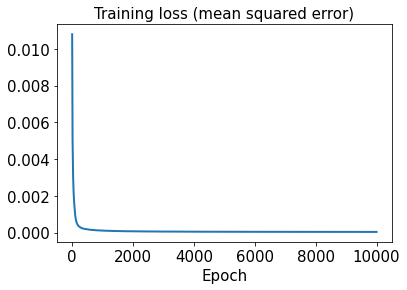

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

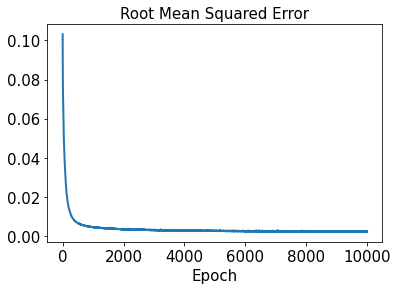

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

29/29 [==============================] - 0s 1ms/step - loss: 2.8883e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0030963717


In [54]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.008626289


In [55]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0048579834, 0.0020653084, 0.0030700641, 0.0008527781, 0.003504931, 0.001311861, 0.0021108952, 0.0026755608, 0.0022761496, 0.0067865755, 0.002026017, 0.0036710338, 0.002214029, 0.0019210172, 0.0042011957, 0.0028387131, 0.0005805959, 0.0009152074, 0.0049332352, 0.00089478015, 0.0013223666, 0.0014771747, 0.002648168, 0.0007129693, 0.002019195, 0.0037767398, 0.0011641476, 0.0045700558, 0.0018728838, 0.0012255956, 0.0060264794, 0.0012375548, 0.0018872896, 0.0020643414, 0.0027337587, 0.005221057, 0.0012927337, 0.0017956384, 0.0014183437, 0.004705933, 0.0032766338, 0.0014185427, 0.003091788, 0.0033908945, 0.0035922716, 0.0021666766, 0.0032754613, 0.0036457244, 0.0025775996, 0.0016922624, 0.0011489168, 0.001409527, 0.0063886396, 0.0010522773, 0.0050505064, 0.0015652515, 0.010437324, 0.0036083006, 0.0051824404, 0.0047273347, 0.0037793892, 0.00570761, 0.008880629, 0.0015502373, 0.0044110413, 0.0021646675, 0.002989259, 0.0030579816, 0.0014195956, 0.005129453, 0.0010484038, 0.0020349636, 0.0013

In [56]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.012777494, 0.009922007, 0.0020994244, 0.03696223, 0.0060045556, 0.010179345, 0.0054696095, 0.026161885, 0.0046546333, 0.0021914553, 0.0045538545, 0.0257605, 0.0035565456, 0.004633469, 0.0023196824, 0.004039338, 0.0108539155, 0.0035718526, 0.004881885, 0.005711753, 0.003609641, 0.0023583143, 0.0034320916, 0.0076707467, 0.0017293695, 0.009744208, 0.0028795707, 0.0046896758, 0.036124967, 0.0048202043, 0.005381412, 0.004158775, 0.0046231686, 0.003444874, 0.011208991, 0.0017202713, 0.014903963, 0.012057984, 0.0057373806, 0.0020250918, 0.007151422, 0.007934464, 0.008714226, 0.0051843263, 0.0040414366, 0.0052114795, 0.01077779, 0.007759428, 0.00545205, 0.010911507, 0.0016149457, 0.005592814, 0.0017122038, 0.0012307214, 0.0025856849, 0.011936534, 0.0019825827, 0.008492101, 0.005701, 0.0065075997, 0.0032147898, 0.0033638317, 0.0034257697, 0.010426893, 0.012336521, 0.0020694085, 0.0025374282, 0.0024327345, 0.0065966034, 0.0024300774, 0.0013398675, 0.005035129, 0.009775096, 0.0034692732, 0.002

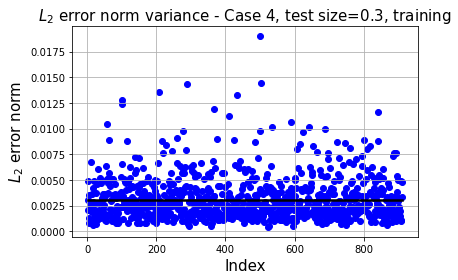

In [57]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 4, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

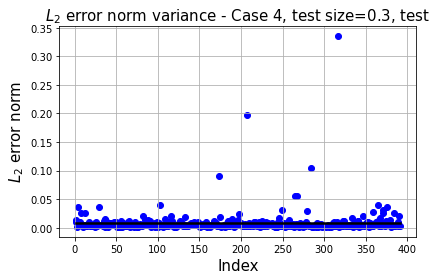

In [58]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 4, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

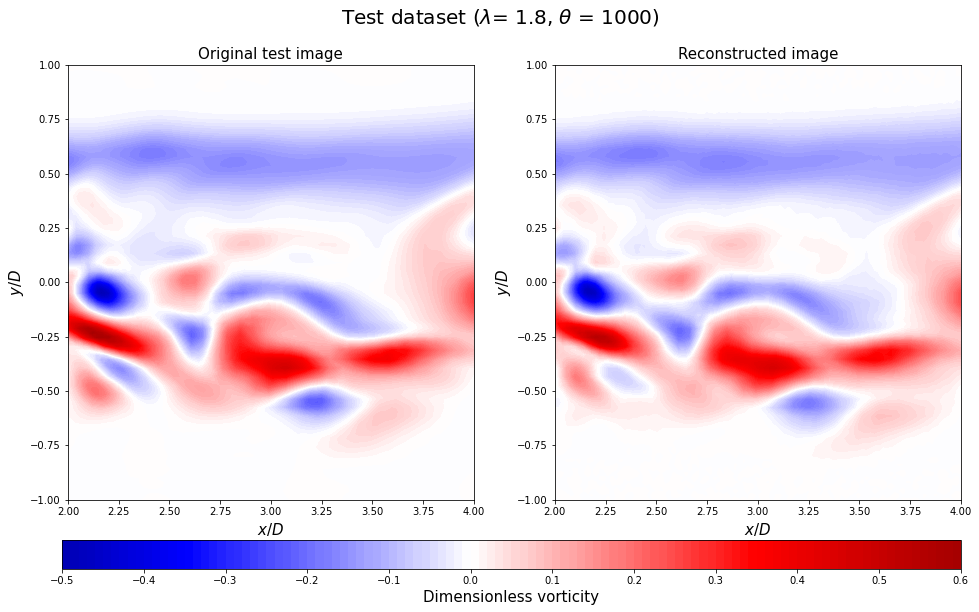

In [59]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

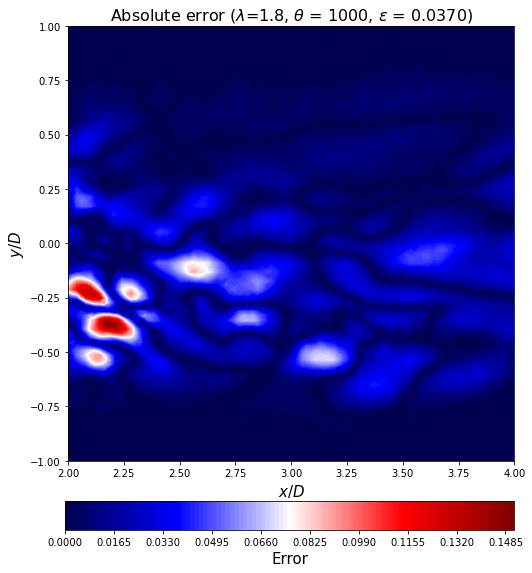

In [60]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()